In [35]:
import pandas as pd
import os
import numpy as np

In [36]:
directory = 'Data'

In [50]:
filenames = [os.path.join(directory, f) for f in os.listdir(
    directory) if os.path.isfile(os.path.join(directory, f))]

In [51]:
filenames=filenames[1:]

In [52]:
len(filenames)

59

In [63]:
merged_data_open = pd.DataFrame()
merged_data_close = pd.DataFrame()
merged_data_high = pd.DataFrame()
merged_data_low = pd.DataFrame()
merged_data_volume = pd.DataFrame()

In [64]:

for filename in filenames:
    symbol = filename.split('_')[2]
    symbol = symbol.split('.')[0]
    column_names = [f'{symbol}_open',\
                        f'{symbol}_high',\
                        f'{symbol}_low',\
                        f'{symbol}_close',\
                        f'{symbol}_volume']
    df = pd.read_csv(filename)
    if len(df)<5500:
        continue
    merged_data_open = pd.concat([merged_data_open, df[column_names[0]]], axis=1)
    merged_data_high = pd.concat([merged_data_high, df[column_names[1]]], axis=1)
    merged_data_low = pd.concat([merged_data_low, df[column_names[2]]], axis=1)
    merged_data_close = pd.concat([merged_data_close, df[column_names[3]]], axis=1)
    merged_data_volume = pd.concat([merged_data_volume, df[column_names[4]]], axis=1)


In [65]:
merged_data_open


B_open  BCO_open  BDX_open  BRK-A_open  CAL_open  CCL_open  CNMD_open  \
0      32.71     68.32    256.86  512653.005     27.38     12.38      94.66   
1      33.43     68.41    261.69  514931.500     28.25     12.69      92.93   
2      33.24     68.02    266.29  514760.000     27.85     12.92      94.87   
3      32.92     67.65    265.04  508564.000     26.66     12.82      92.63   
4      32.92     68.97    261.34  514438.005     26.15     12.66      92.64   
...      ...       ...       ...         ...       ...       ...        ...   
6031     NaN     18.81       NaN   66700.000       NaN       NaN      23.63   
6032     NaN     19.25       NaN   65800.000       NaN       NaN      23.63   
6033     NaN     19.00       NaN   65900.000       NaN       NaN      23.50   
6034     NaN     18.62       NaN   63500.000       NaN       NaN      24.06   
6035     NaN     19.00       NaN   64400.000       NaN       NaN      24.94   

      CPK_open  CRD-A_open  DUK_open  ...  RYN_open  SGU_open  SHEL_open  \
0        92.72        8.81     88.94  ...     27.00     11.61      67.14   
1        93.65        8.91     89.53  ...     27.67     11.36      66.48   
2        92.69        9.04     89.40  ...     27.70     11.90      66.48   
3        93.00        8.68     88.25  ...     27.44     11.93      66.03   
4        92.84        8.91     86.67  ...     27.28     11.42      65.48   
...        ...         ...       ...  ...       ...       ...        ...   
6031       NaN       11.50       NaN  ...       NaN       NaN        NaN   
6032       NaN       11.25       NaN  ...       NaN       NaN        NaN   
6033       NaN       11.44       NaN  ...       NaN       NaN        NaN   
6034       NaN       11.38       NaN  ...       NaN       NaN        NaN   
6035       NaN       12.19       NaN  ...       NaN       NaN        NaN   

      TR_open  TRN_open  TRV_open  UFI_open  UGP_open  WTRG_open  WY_open  
0       29.62     20.39    165.67      6.76      4.05      33.65    28.65  
1       29.13     20.60    158.73      6.68      3.99      34.07    28.85  
2       29.24     21.55    159.65      6.76      3.92      34.26    28.96  
3       29.85     21.51    161.15      6.76      3.88      33.65    29.03  
4       29.91     21.86    164.62      6.73      3.90      33.11    29.31  
...       ...       ...       ...       ...       ...        ...      ...  
6031    32.75     29.81     35.00       NaN     10.88        NaN    64.55  
6032    33.50     30.62     31.94       NaN     10.94        NaN    64.06  
6033    32.75     30.19     33.00       NaN     10.88        NaN    61.76  
6034    31.56     29.94     31.50       NaN     10.38        NaN    62.50  
6035    31.94     29.81     32.00       NaN     10.94        NaN    61.08  

[6036 rows x 40 columns]

In [66]:
all_dfs = []
all_dfs.append(merged_data_open)
all_dfs.append(merged_data_high)
all_dfs.append(merged_data_low)
all_dfs.append(merged_data_close)
all_dfs.append(merged_data_volume)


In [67]:
for df in all_dfs:
    df.dropna(axis=0,inplace=True)

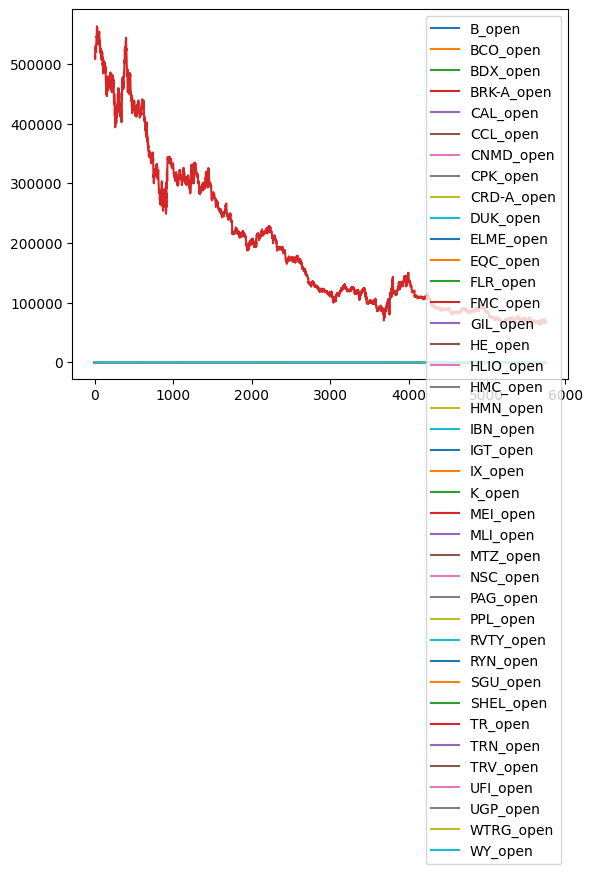

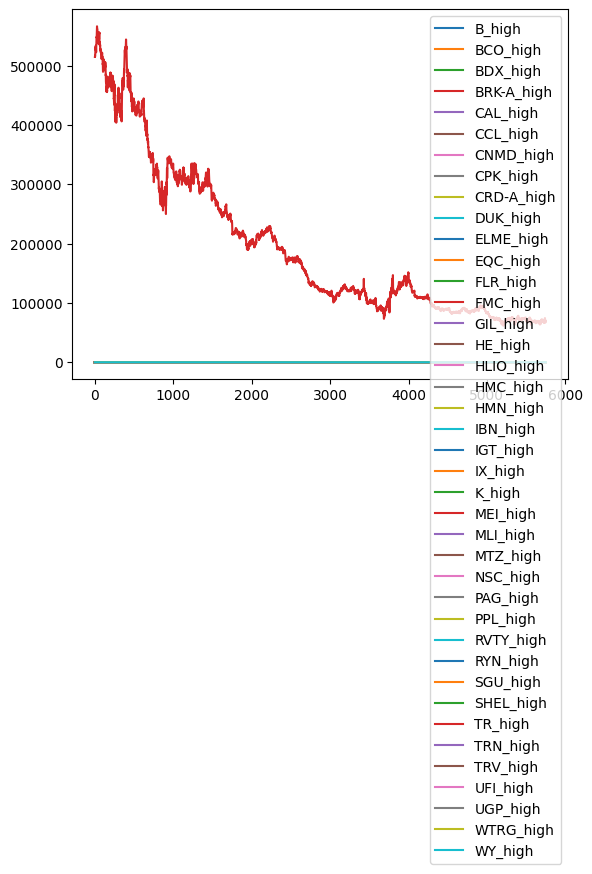

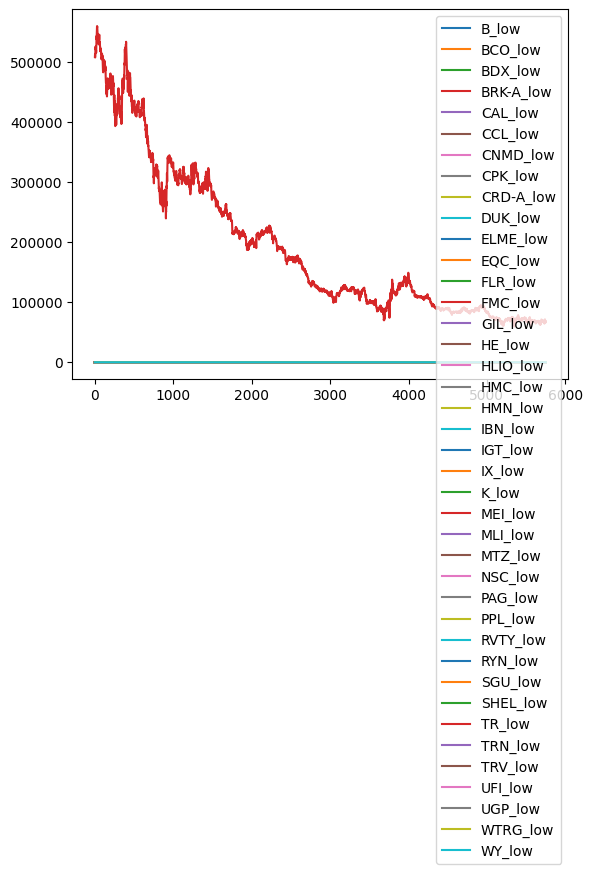

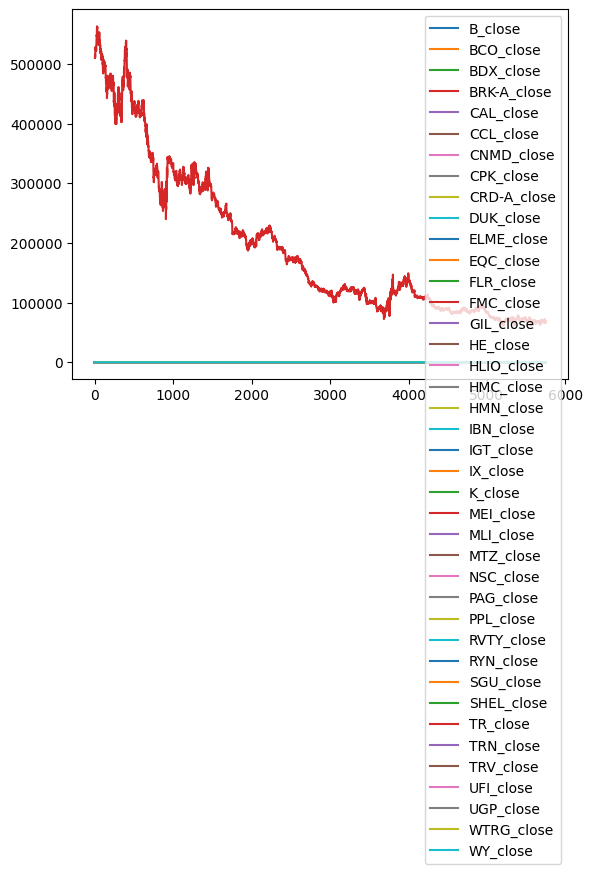

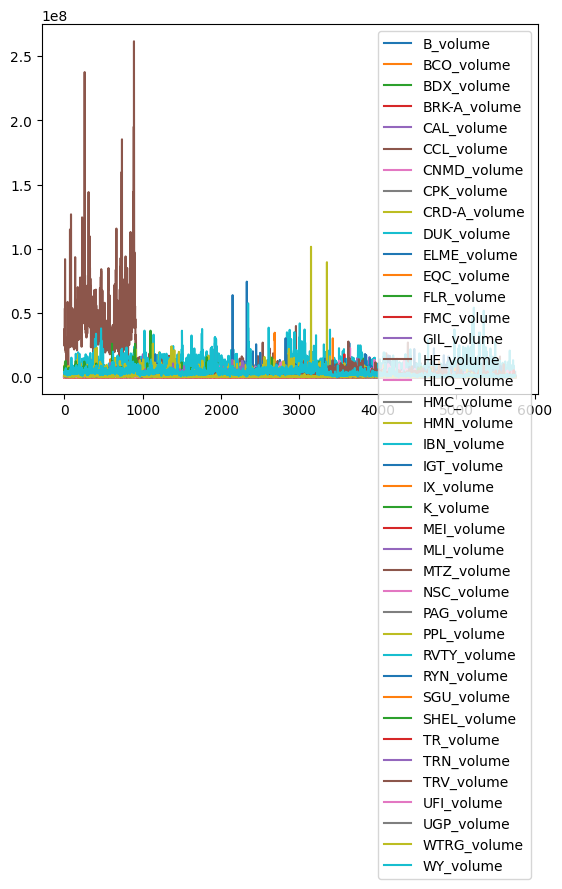

In [68]:
for df in all_dfs:
    df.plot()

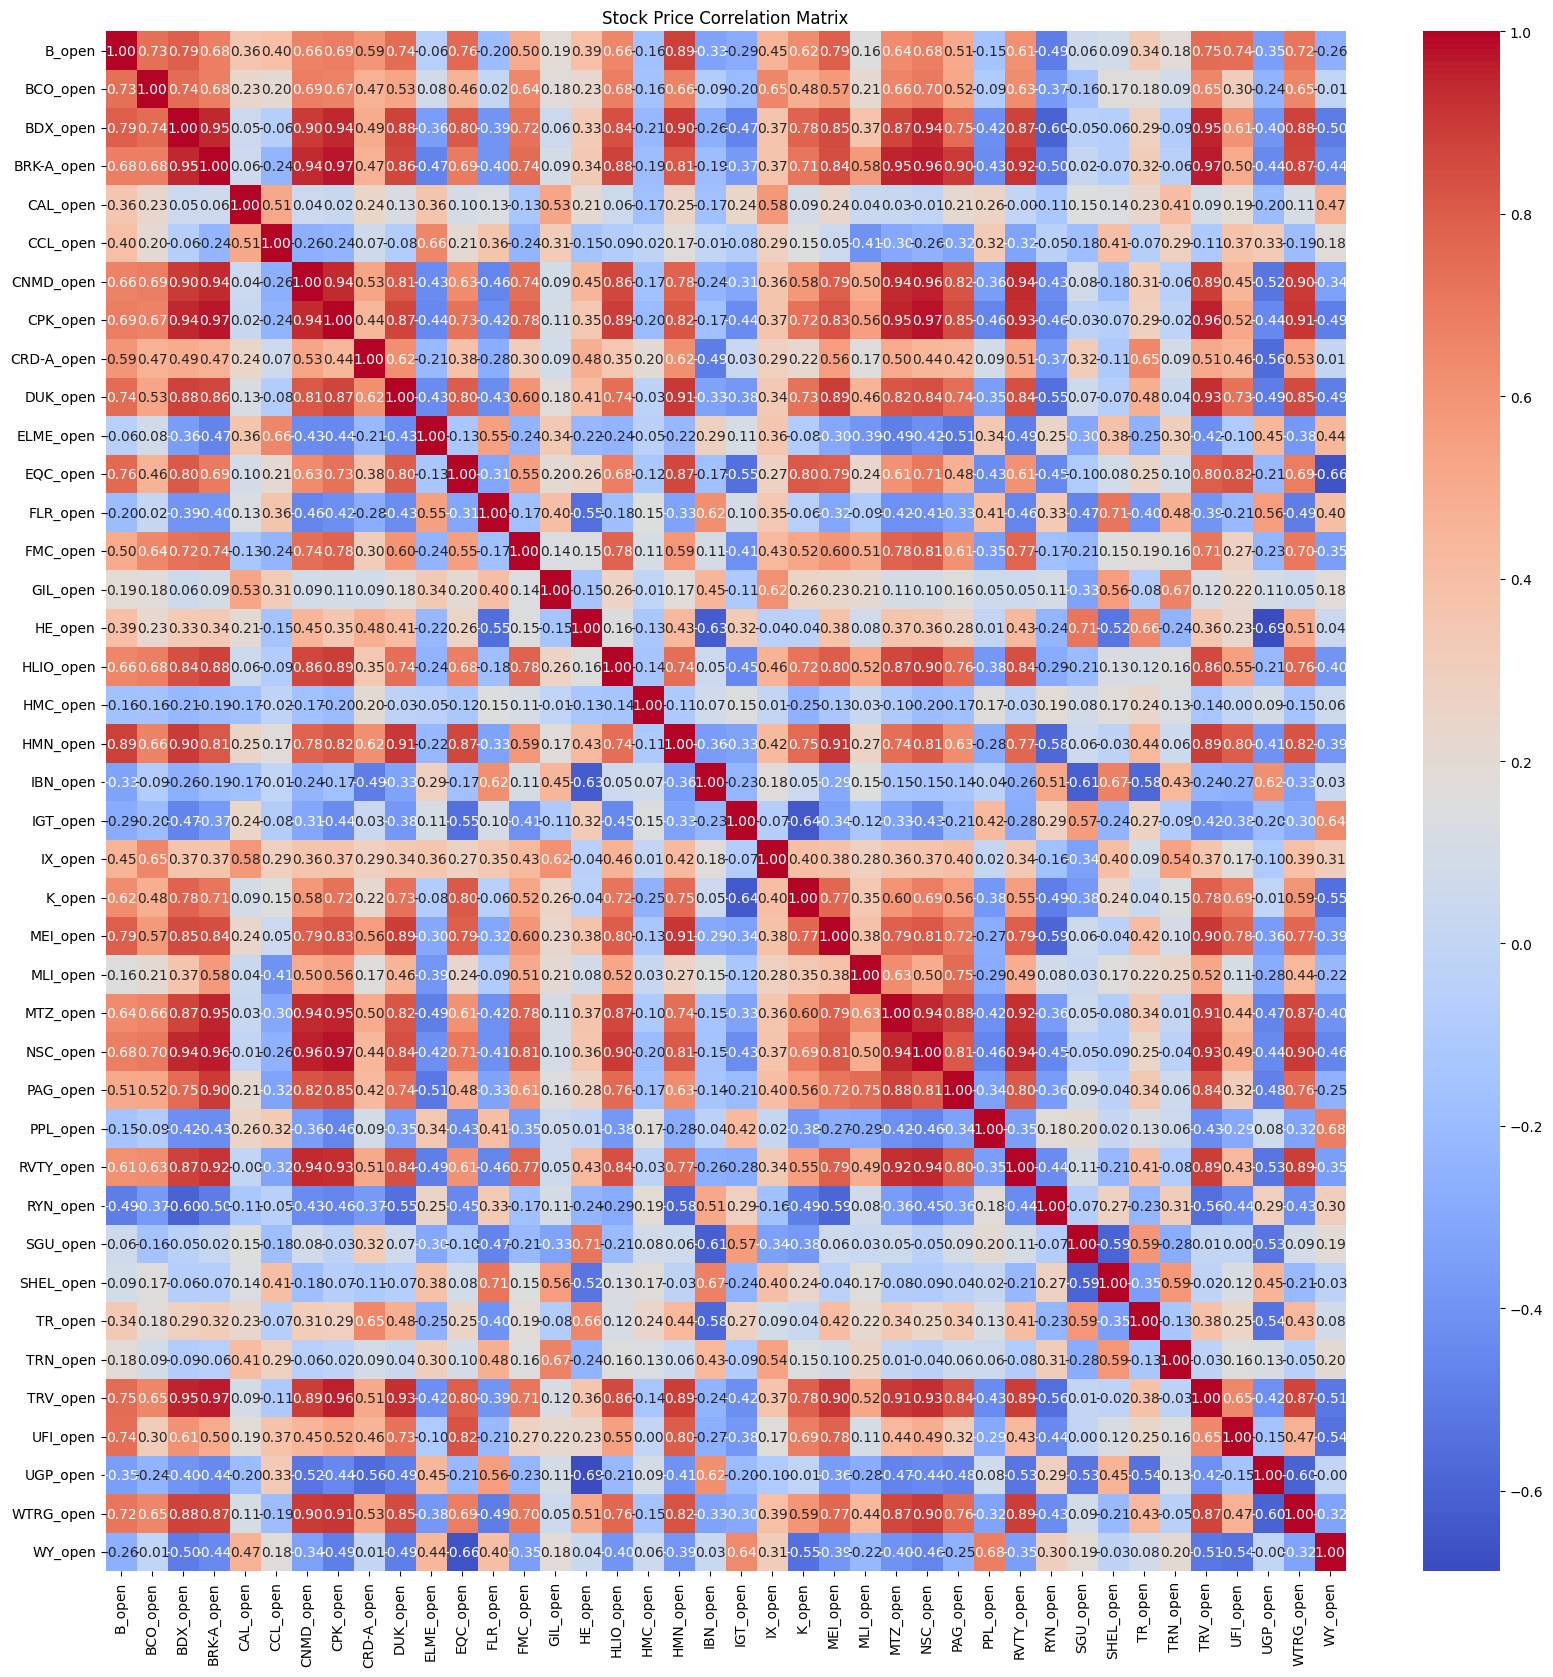

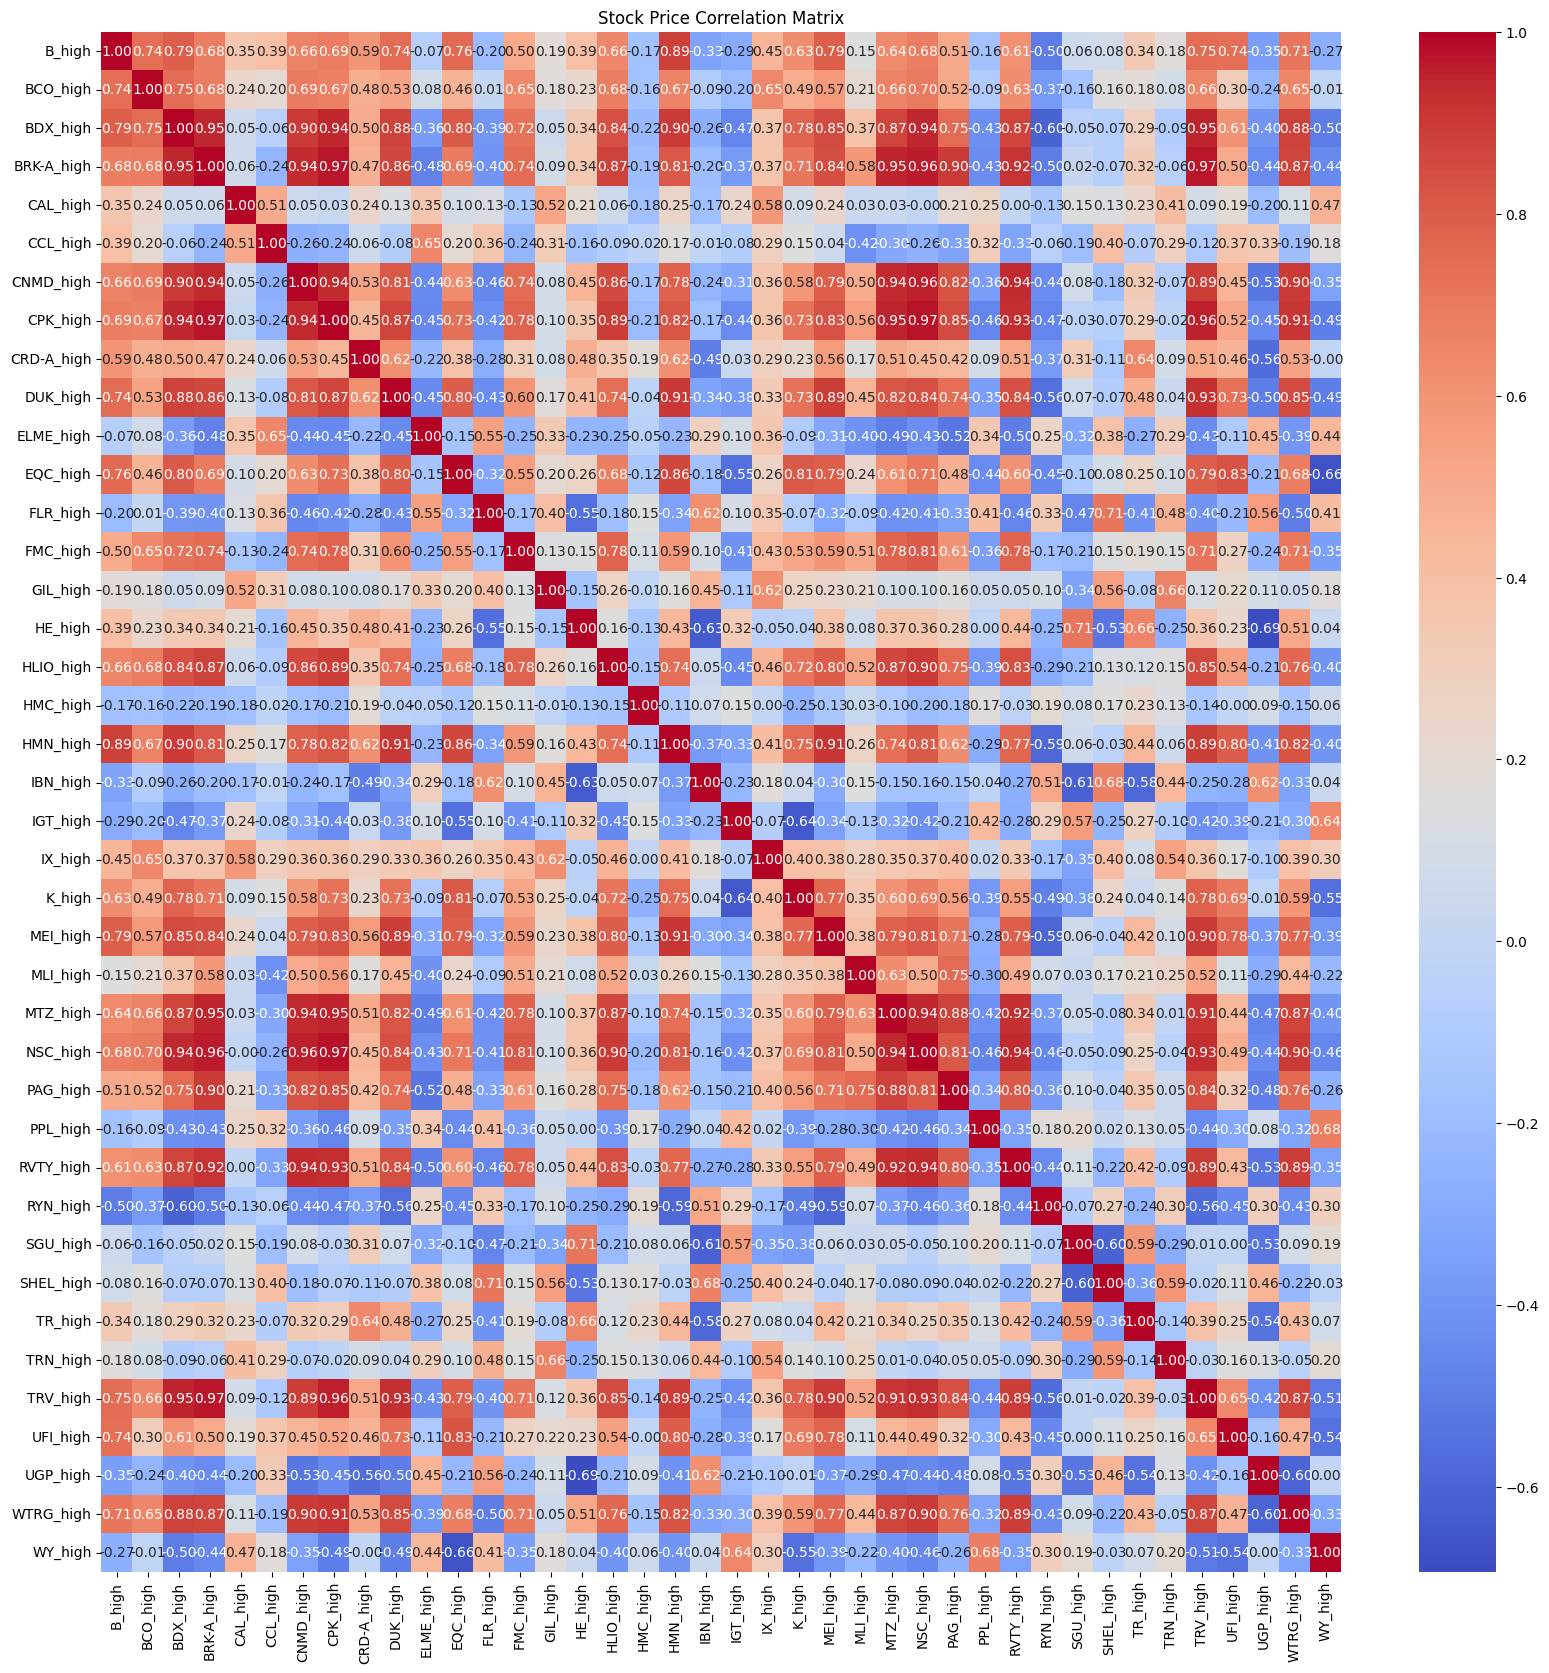

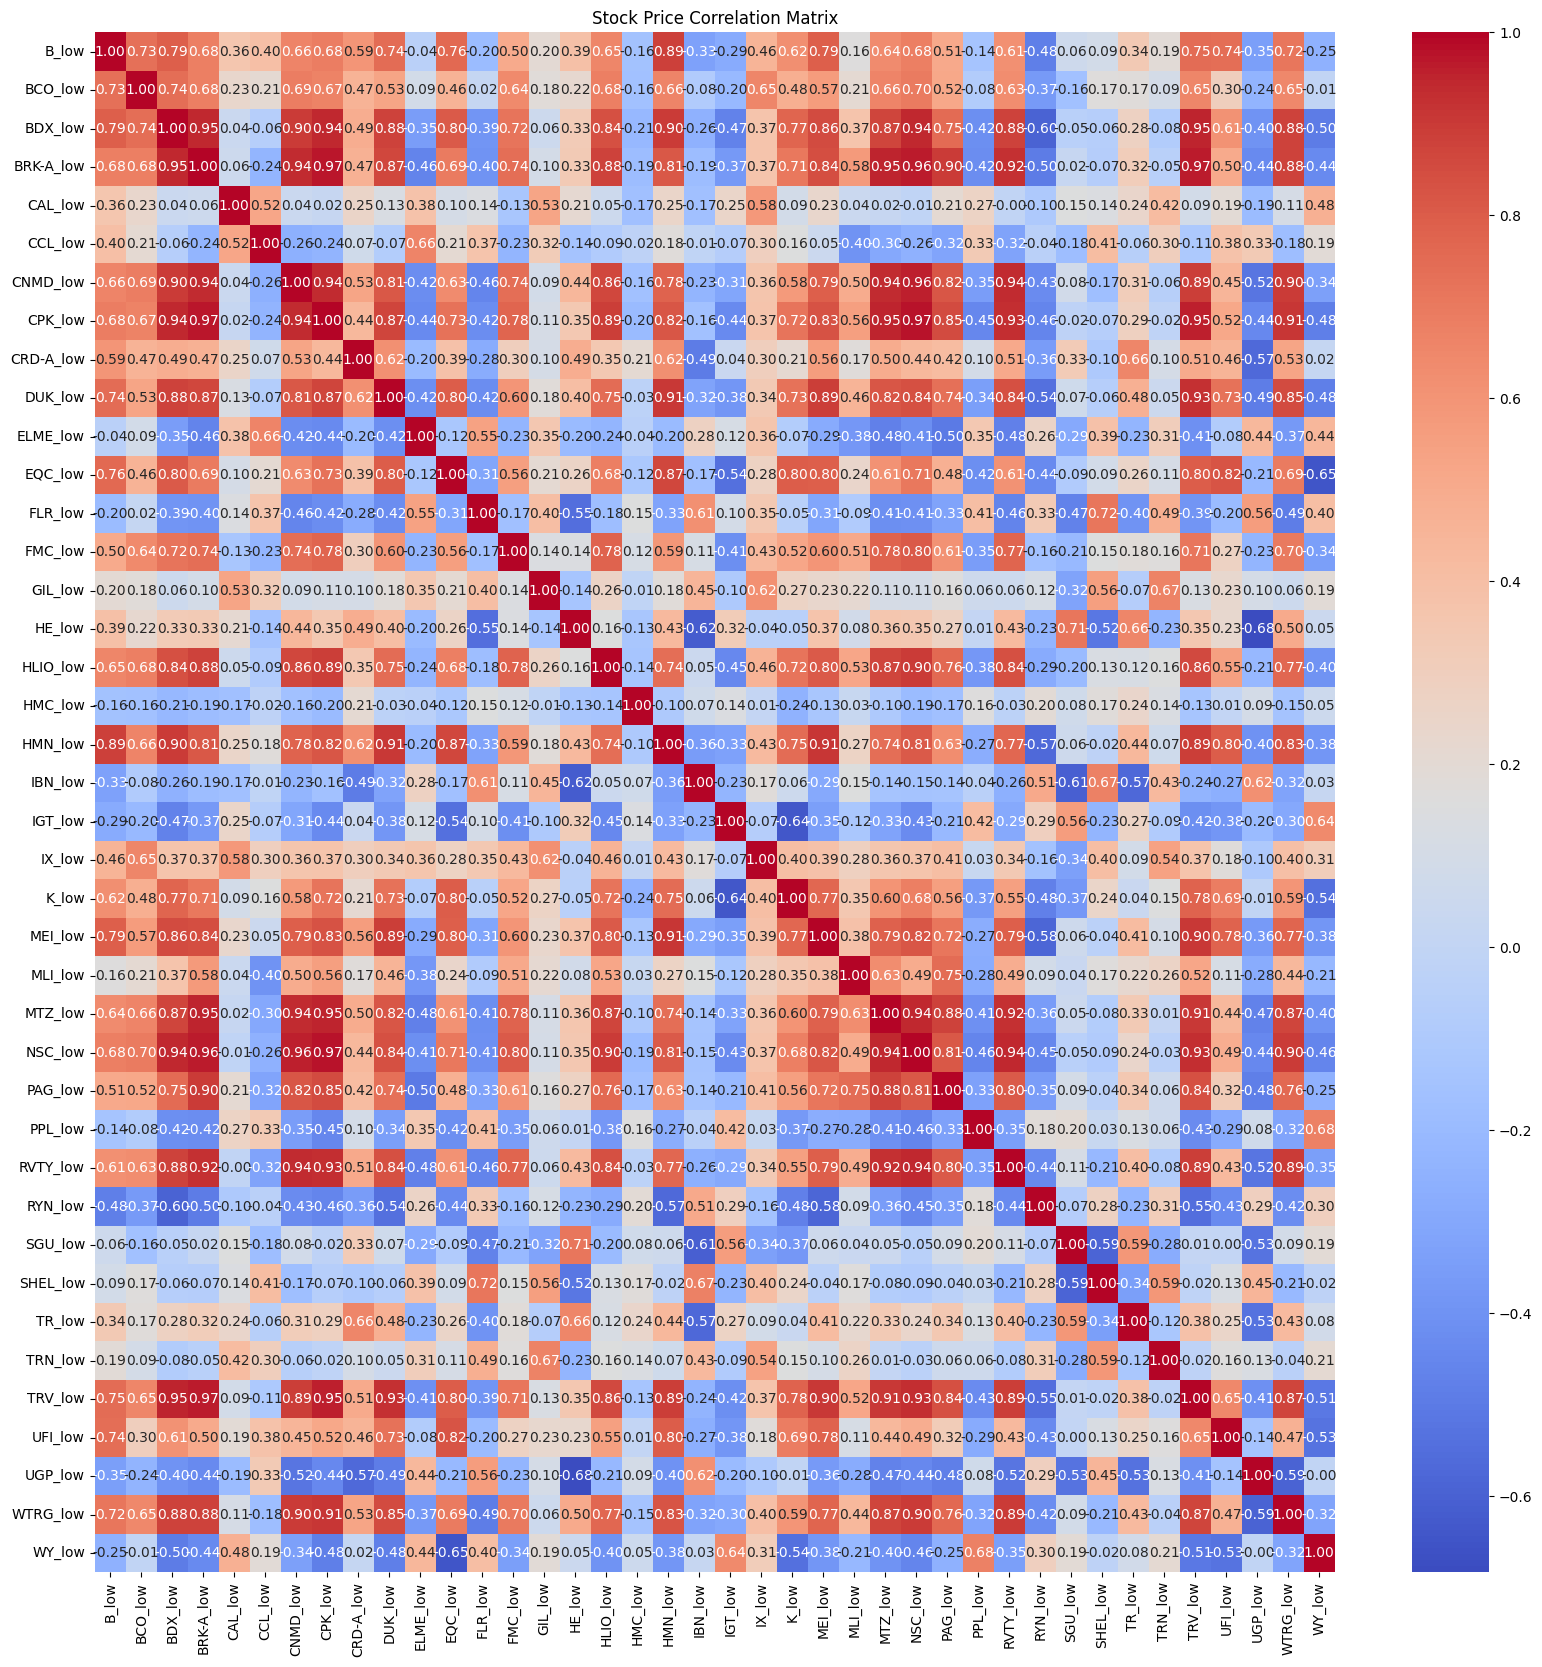

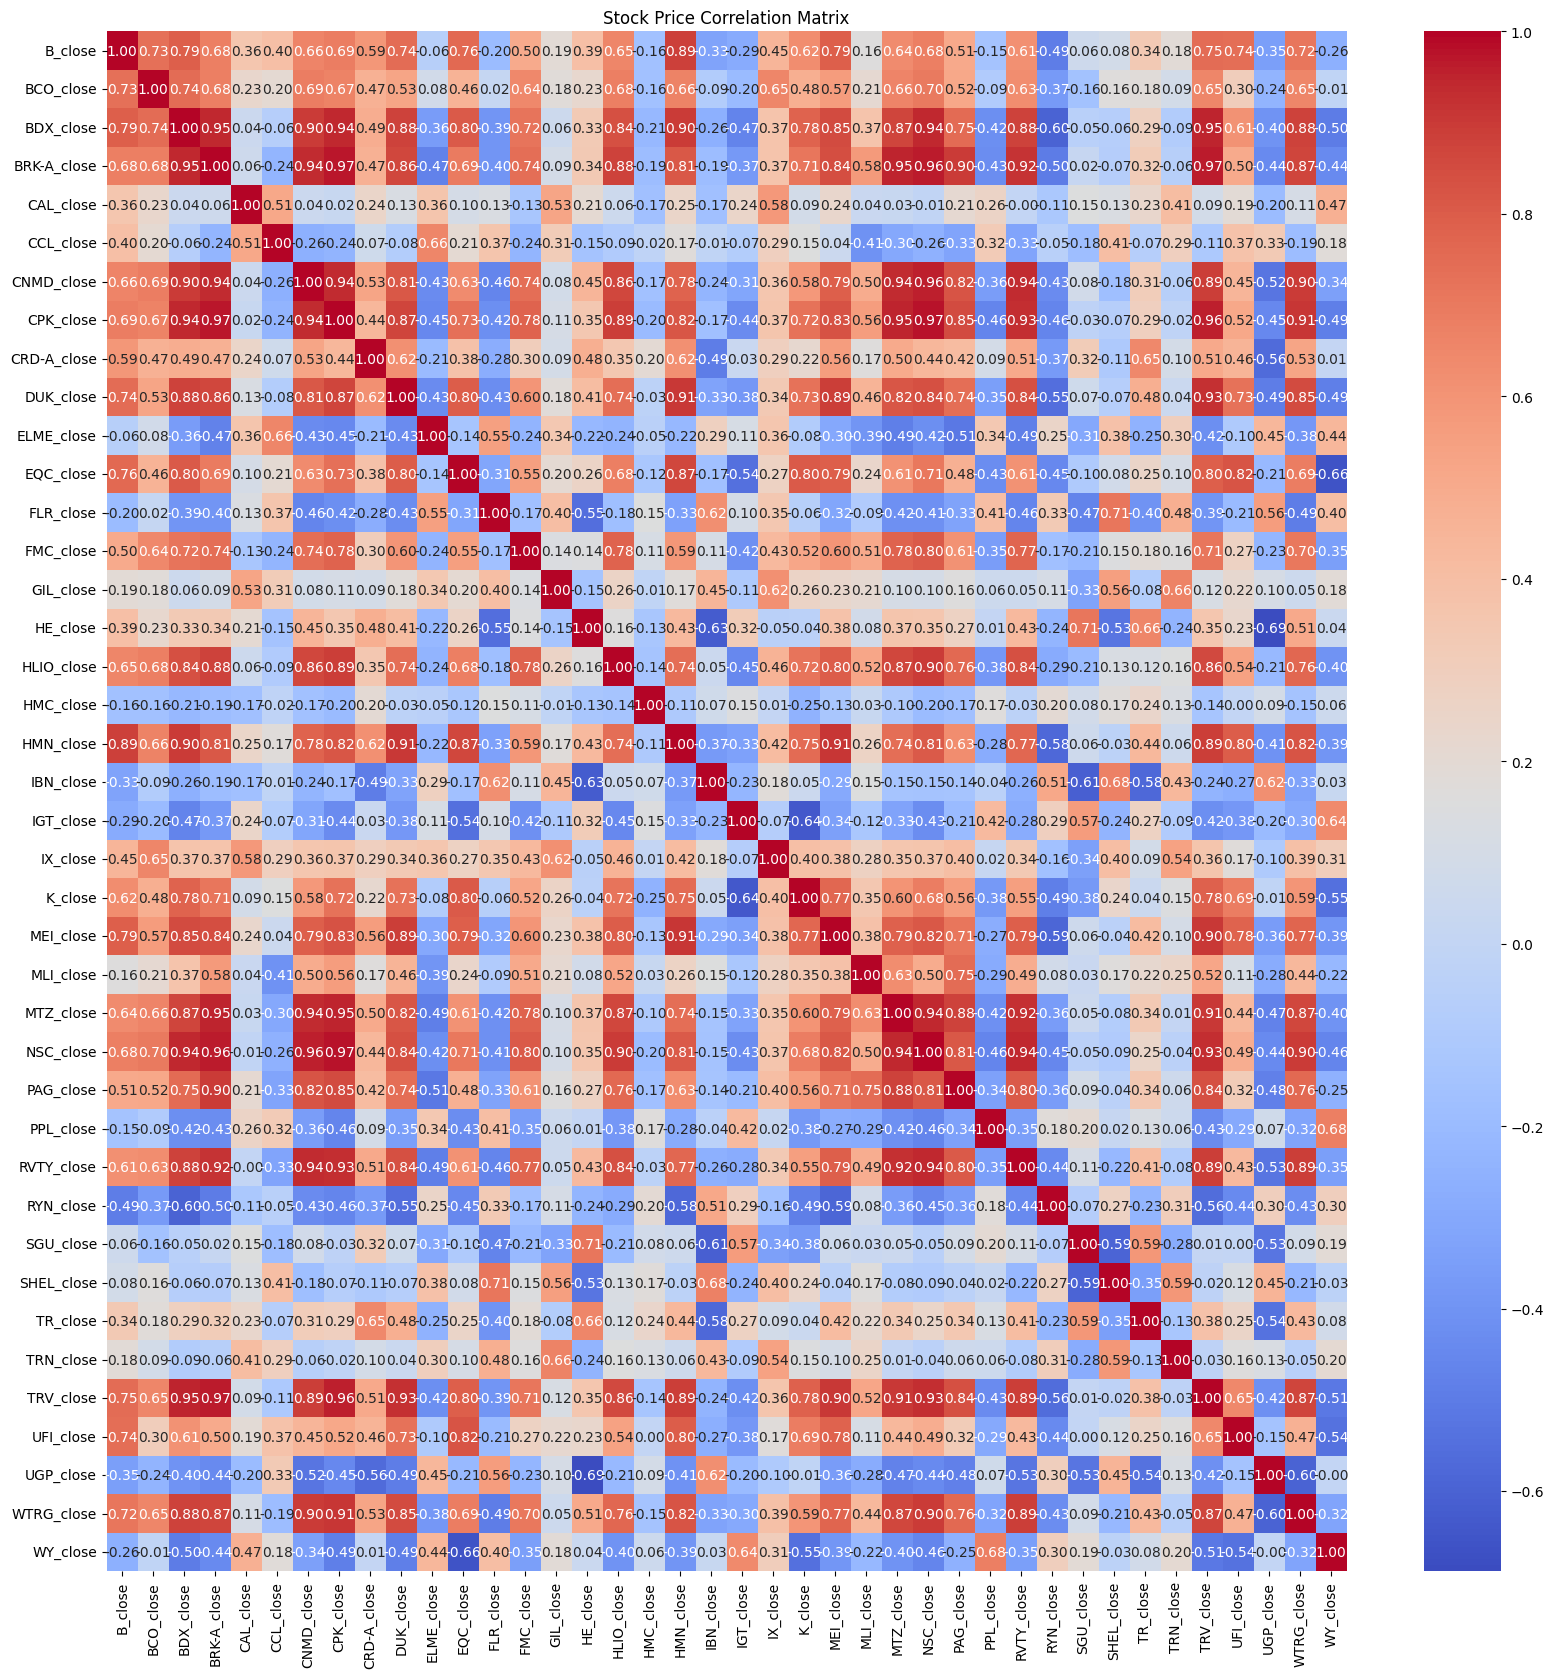

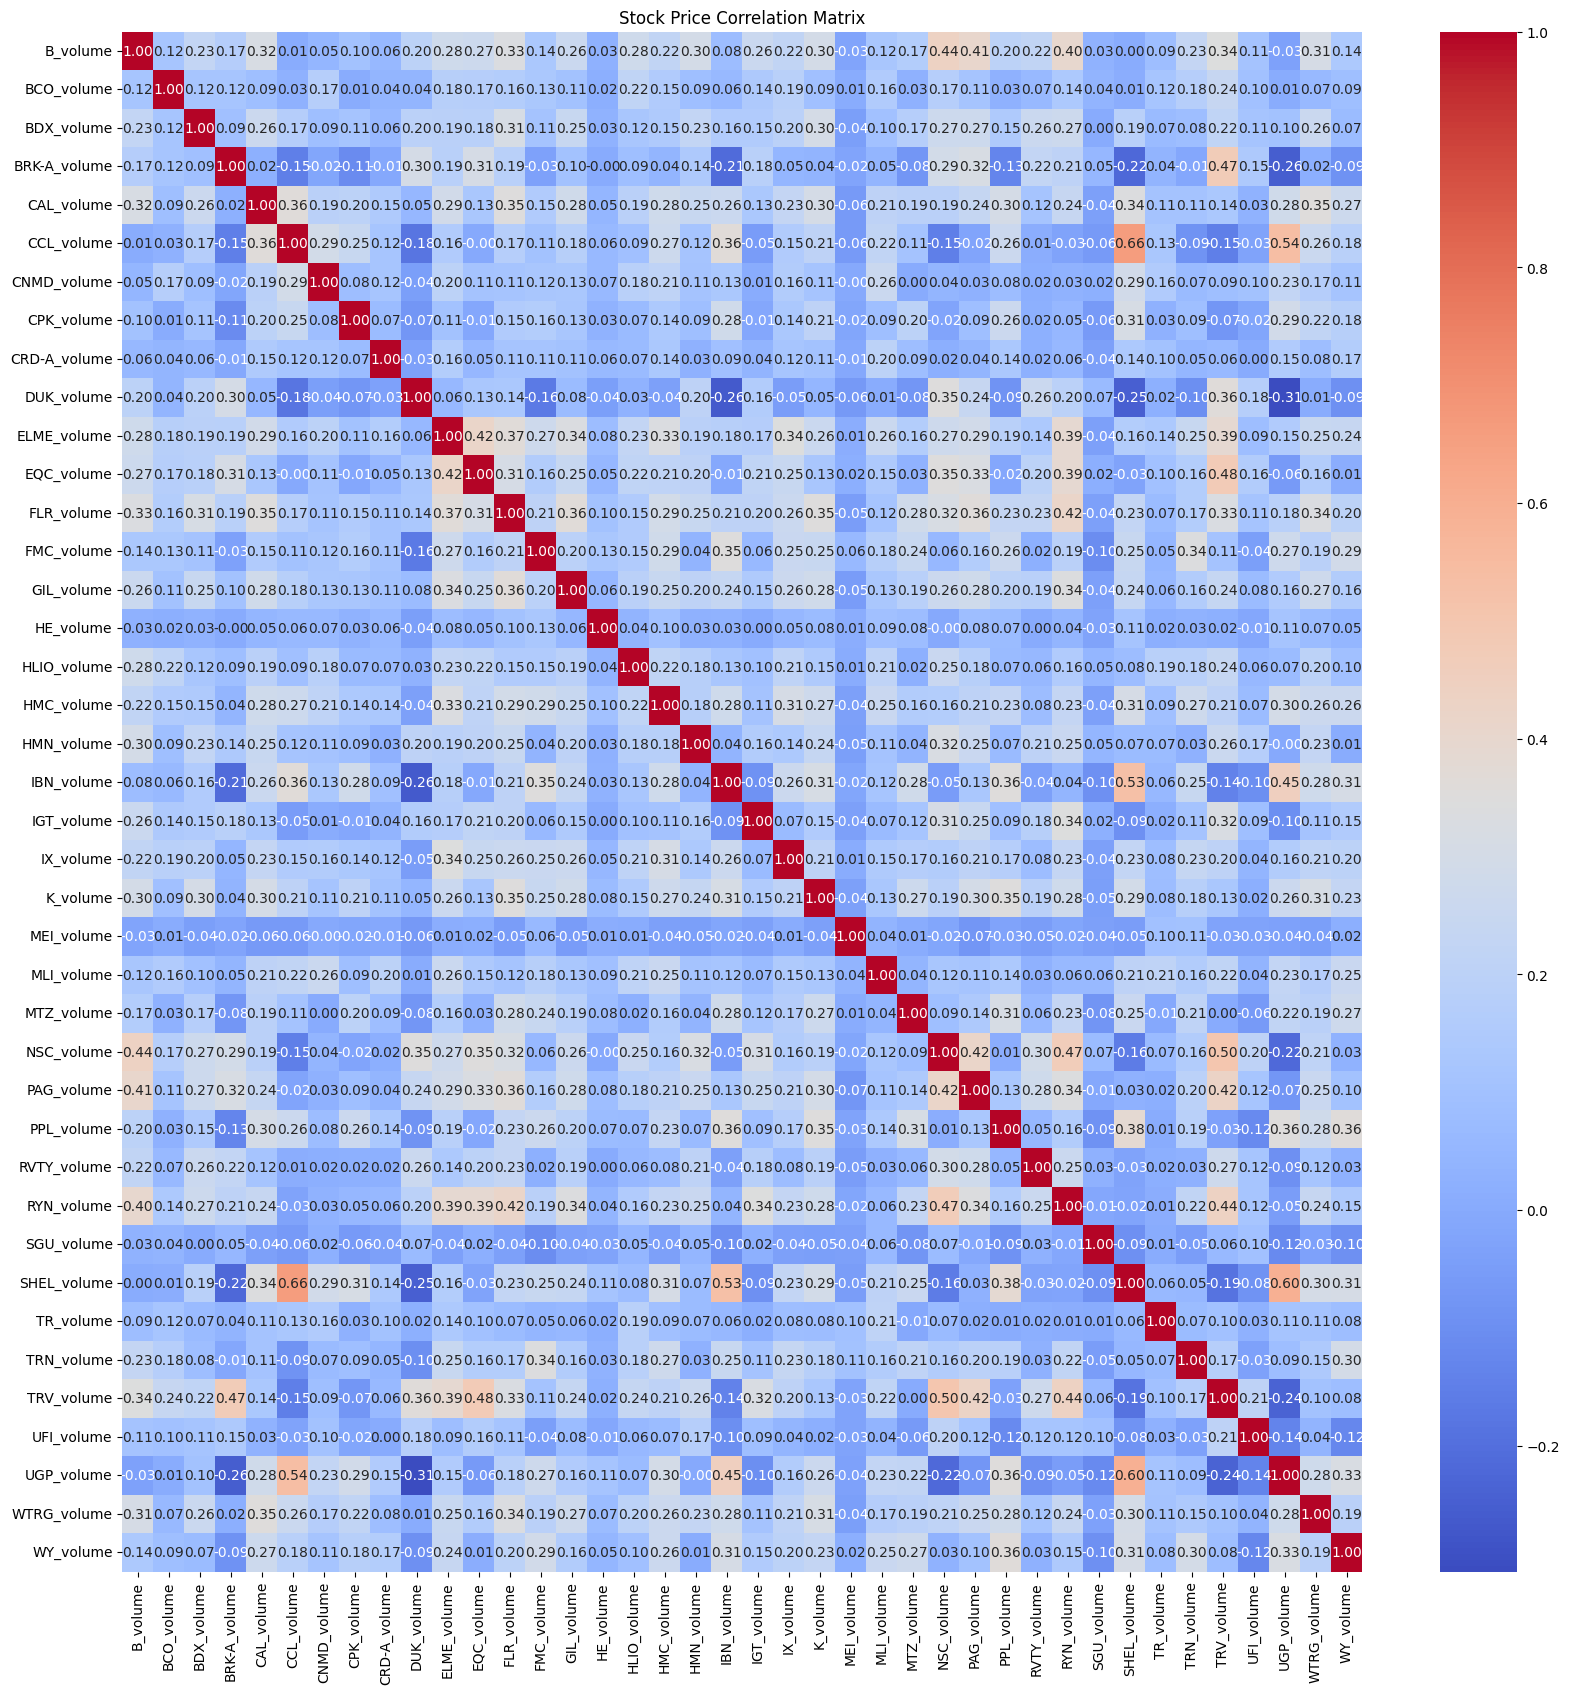

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

for df in all_dfs:
    correlation_matrix = df.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Stock Price Correlation Matrix")
    plt.show()


In [70]:
all_dfs.pop()

B_volume  BCO_volume  BDX_volume  BRK-A_volume  CAL_volume  CCL_volume  \
0     190788.0      264810   1032043.0          7210    301567.0  25978345.0   
1     158620.0      200955   1100175.0          7082    412521.0  28842136.0   
2     109781.0      220864   1693456.0          6713    368900.0  25157690.0   
3     167761.0      182572    987466.0          8917    501694.0  26502371.0   
4     129737.0      226824    690136.0          7791    301064.0  37982260.0   
...        ...         ...         ...           ...         ...         ...   
5747    4700.0      111900    411400.0         34000     66666.0   2824200.0   
5748   17500.0      197400   1959100.0         20000     40177.0   2212700.0   
5749   18300.0      172500   1658000.0         39000     40400.0   1012500.0   
5750   13600.0      249200    923400.0         50000     50977.0   2251300.0   
5751    2700.0      114500    684800.0        107000     38800.0   1668000.0   

      CNMD_volume  CPK_volume  CRD-A_volume  DUK_volume  ...  RYN_volume  \
0         1206253    112851.0         37883   3277003.0  ...    362565.0   
1          628897     87720.0         27246   3172508.0  ...    381743.0   
2          505670     71310.0         32569   2658873.0  ...    281761.0   
3          425502    127215.0         55039   2619522.0  ...    347275.0   
4          342720     90397.0         48584   3008704.0  ...    339493.0   
...           ...         ...           ...         ...  ...         ...   
5747       137400      9800.0             0   2940900.0  ...     69304.0   
5748        77000      4400.0           400   3504900.0  ...    114489.0   
5749        72000     13733.0          8300   3829200.0  ...    176059.0   
5750        64000      3733.0          7200   2827500.0  ...    313393.0   
5751        25800     14200.0          7500   4344600.0  ...    191615.0   

      SGU_volume  SHEL_volume  TR_volume  TRN_volume  TRV_volume  UFI_volume  \
0        20316.0    8064370.0      83244      567017     1972397     30789.0   
1        32102.0    5893114.0      41416      735756     2084022    101820.0   
2        50719.0    6390396.0      54405      291608     2201773     28437.0   
3        12473.0    5700124.0      92184      335942     1503556     40281.0   
4        21465.0    7330905.0     125523      429550     1539788     40274.0   
...          ...          ...        ...         ...         ...         ...   
5747     21900.0     240500.0     939400      121267      880300    114600.0   
5748     19600.0     216000.0      21200      107267     1554900    116100.0   
5749     29200.0     303300.0      24500      117667     1561900    236100.0   
5750     51600.0     230000.0      32900      221267     1318300     70800.0   
5751     16200.0     222500.0      90200       73600     1106100     69600.0   

      UGP_volume  WTRG_volume  WY_volume  
0        1516848    1070793.0    3988615  
1         875927    1055135.0    4321908  
2         776079     779924.0    3181015  
3         610877    1477868.0    3557463  
4         858405     716412.0    4143400  
...          ...          ...        ...  
5747        2200      35789.0    1015400  
5748       12100      36902.0    1029100  
5749        5500     109133.0    1250200  
5750       15500      34591.0     875700  
5751       32000      33546.0    1248000  

[5752 rows x 40 columns]

In [71]:
masks = []
for df in all_dfs:
    correlation_matrix = df.corr()
    mask = correlation_matrix >= 0.7
    mask &= correlation_matrix<1.0
    mask.columns = [i.split('_')[0] for i in mask.columns]
    mask.index = [i.split('_')[0] for i in mask.columns]
    masks.append(mask)
common_mask = masks[0] & masks[1] & masks[2] & masks[3]


In [72]:
distance_matrix = np.where(common_mask, 0, 1)
distance_matrix

array([[1, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

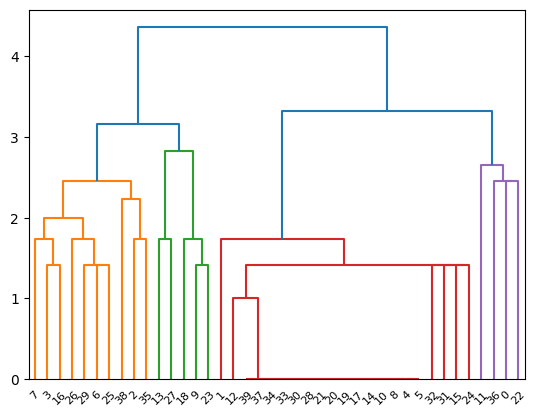

In [73]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='complete')

# Plot the dendrogram to visualize the clusters
dendrogram(linkage_matrix)
plt.show()


In [74]:
from scipy.cluster.hierarchy import fcluster

# Set a threshold height to determine the number of clusters
threshold = 3

# Get cluster assignments
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

print("Cluster assignments:", clusters)


Cluster assignments: [4 3 1 1 3 3 1 1 3 2 3 4 3 2 3 3 1 3 2 3 3 3 4 2 3 1 1 2 3 1 3 3 3 3 3 1 4
 3 1 3]


In [75]:
import pandas as pd
import networkx as nx

# Create a DataFrame from the data
df = pd.DataFrame(distance_matrix)
df.columns = common_mask.columns
# Create an empty graph
G = nx.Graph()

# Add nodes (people) to the graph
G.add_nodes_from(df.columns)

# Iterate through the DataFrame to add edges (friendships)
for person1 in df.columns:
    for person2 in df.columns:
        if person1 != person2 and df[person1].equals(df[person2]):
            G.add_edge(person1, person2)

# Find the largest clique in the graph
cliques = list(nx.find_cliques(G))
largest_clique = max(cliques, key=len)

print("The largest group of friends where everyone is friends with each other:")
print(largest_clique)


The largest group of friends where everyone is friends with each other:
['IGT', 'HMC', 'CCL', 'CRD-A', 'RYN', 'TRN', 'TR', 'ELME', 'WY', 'GIL', 'IX', 'PPL', 'UGP', 'IBN', 'CAL']


In [76]:
G = nx.Graph()

# Add nodes (people) to the graph
G.add_nodes_from(df.columns)
for column in df.columns:
    for i, val in enumerate(df[column]):
        if val==1:
            G.add_edge(df.columns[i], column)
cliques = list(nx.find_cliques(G))
largest_clique = max(cliques, key=len)
print(largest_clique)


['IGT', 'CRD-A', 'TR', 'ELME', 'HMC', 'CCL', 'RYN', 'TRN', 'IBN', 'CAL', 'WY', 'GIL', 'IX', 'PPL', 'UGP', 'PAG', 'FMC', 'FLR', 'HE', 'BCO', 'UFI', 'K']


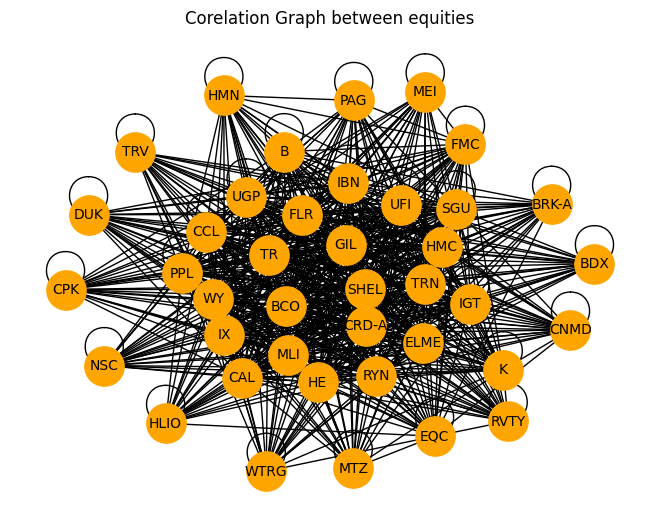

In [77]:
pos = nx.spring_layout(G)  # Layout algorithm

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, cmap=plt.cm.rainbow, node_color='orange',
        node_size=800, font_size=10)
plt.title("Corelation Graph between equities")
plt.show()



In [78]:
processed_dfs=[]
for df in all_dfs:
    modified_symbols = [i+'_'+df.columns[0].split('_')[1] for i in largest_clique]
    df1 = df[modified_symbols]
    processed_dfs.append(df1)

In [79]:
processed_dfs[0].head(1)

IGT_open  CRD-A_open  TR_open  ELME_open  HMC_open  CCL_open  RYN_open  \
0      30.8        8.81    29.62      13.55     31.99     12.38      27.0   

   TRN_open  IBN_open  CAL_open  ...  IX_open  PPL_open  UGP_open  PAG_open  \
0     20.39     22.73     27.38  ...     88.9     23.86      4.05    150.57   

   FMC_open  FLR_open  HE_open  BCO_open  UFI_open  K_open  
0     56.36     37.17    12.61     68.32      6.76   48.71  

[1 rows x 22 columns]

In [80]:
import pandas as pd
import numpy as np
import pandas_ta as ta
pro_processed_dfs=[]
for df1 in processed_dfs:
    df=df1.copy()
    for col in df.columns:
        df[f'{col}_Momentum'] = df[col] - df[col].shift(1)

    window = 20
    for col in df1.columns:
        df[f'{col}_MA'] = df[col].rolling(window).mean()
        df[f'{col}_Upper_Band'] = df[f'{col}_MA'] + \
            2 * df[col].rolling(window).std()
        df[f'{col}_Lower_Band'] = df[f'{col}_MA'] - \
            2 * df[col].rolling(window).std()
    for col in df1.columns:
        df.ta.macd(close=col, fast=12, slow=26, append=True)
        df.rename(columns={'MACD_12_26_9': f'{col}_MACD', 'MACDh_12_26_9': f'{col}_MACDh',
                  'MACDs_12_26_9': f'{col}_MACDs'}, inplace=True)
    short_window = 12 
    long_window = 26
    for col in df1.columns:
        ema12 = df[col].ewm(span=short_window).mean()
        ema26 = df[col].ewm(span=long_window).mean()
        df[f'{col}_EMA12'] = ema12
        df[f'{col}_EMA26'] = ema26



    df.dropna(inplace=True)
    df = df.sort_index(axis=1)
    df = df.reset_index(drop=True)
    pro_processed_dfs.append(df)

In [106]:
pro_processed_dfs[1].head()

BCO_high  BCO_high_EMA12  BCO_high_EMA26  BCO_high_Lower_Band  BCO_high_MA  \
0     76.26       75.841024       74.819408            70.735919     74.64061   
1     76.27       75.907212       74.934654            70.891983     74.79611   
2     76.16       75.946198       75.031484            71.175487     74.97611   
3     76.17       75.980700       75.121010            71.492970     75.15511   
4     75.88       75.965181       75.180421            71.852228     75.31961   

   BCO_high_MACD  BCO_high_MACDh  BCO_high_MACDs  BCO_high_Momentum  \
0       1.487978        0.056125        1.431853              -0.08   
1       1.414984       -0.013495        1.428479               0.01   
2       1.332896       -0.076467        1.409362              -0.11   
3       1.254189       -0.124139        1.378328               0.01   
4       1.155098       -0.178584        1.333682              -0.29   

   BCO_high_Upper_Band  ...  WY_high  WY_high_EMA12  WY_high_EMA26  \
0            78.545301  ...   32.295      32.086984      31.573169   
1            78.700237  ...   32.530      32.155338      31.649187   
2            78.776733  ...   32.500      32.208493      31.716420   
3            78.817250  ...   32.410      32.239558      31.770959   
4            78.786992  ...   32.720      32.313602      31.845247   

   WY_high_Lower_Band  WY_high_MA  WY_high_MACD  WY_high_MACDh  WY_high_MACDs  \
0           29.506546    31.48150      0.756344      -0.012609       0.768953   
1           29.686741    31.60275      0.736782      -0.025737       0.762519   
2           29.885197    31.71850      0.710666      -0.041482       0.752148   
3           30.192194    31.84250      0.674926      -0.061777       0.736704   
4           30.484916    31.97125      0.663963      -0.058192       0.722156   

   WY_high_Momentum  WY_high_Upper_Band  
0            -0.005           33.456454  
1             0.235           33.518759  
2            -0.030           33.551803  
3            -0.090           33.492806  
4             0.310           33.457584  

[5 rows x 220 columns]

In [108]:
for i, idx in enumerate(pro_processed_dfs):
    idx.to_csv(f'Data/processed_{i}')

In [81]:
df

BCO_close  BCO_close_EMA12  BCO_close_EMA26  BCO_close_Lower_Band  \
0         75.77        75.092378        73.885682             69.476921   
1         75.81        75.203101        74.038564             69.564219   
2         75.59        75.262770        74.161163             69.787681   
3         75.60        75.314759        74.274304             70.026511   
4         75.23        75.301696        74.349113             70.512809   
...         ...              ...              ...                   ...   
5714      17.56        19.111531        19.572995             17.792077   
5715      18.38        18.998988        19.484625             17.662185   
5716      18.25        18.883759        19.393172             17.550801   
5717      16.75        18.555488        19.197381             17.153620   
5718      17.69        18.422336        19.085723             17.091024   

      BCO_close_MA  BCO_close_MACD  BCO_close_MACDh  BCO_close_MACDs  \
0          73.7500        1.738170         0.154187         1.583982   
1          73.9040        1.669366         0.068307         1.601059   
2          74.0865        1.578886        -0.017738         1.596625   
3          74.2640        1.490802        -0.084658         1.575460   
4          74.4760        1.375285        -0.160140         1.535425   
...            ...             ...              ...              ...   
5714       19.8190       -0.461464        -0.257067        -0.204397   
5715       19.6785       -0.485637        -0.224992        -0.260645   
5716       19.5315       -0.509413        -0.199014        -0.310399   
5717       19.3000       -0.641893        -0.265195        -0.376698   
5718       19.1155       -0.663387        -0.229351        -0.434036   

      BCO_close_Momentum  BCO_close_Upper_Band  ...  WY_close  WY_close_EMA12  \
0                  -0.51             78.023079  ...     32.04       31.836631   
1                   0.04             78.243781  ...     32.10       31.877266   
2                  -0.22             78.385319  ...     32.45       31.965595   
3                   0.01             78.501489  ...     32.39       32.031024   
4                  -0.37             78.439191  ...     31.92       32.013913   
...                  ...                   ...  ...       ...             ...   
5714               -0.63             21.845923  ...     45.56       50.021177   
5715                0.82             21.694815  ...     47.88       49.691765   
5716               -0.13             21.512199  ...     46.75       49.239186   
5717               -1.50             21.446380  ...     45.44       48.654696   
5718                0.94             21.139976  ...     45.75       48.207820   

      WY_close_EMA26  WY_close_Lower_Band  WY_close_MA  WY_close_MACD  \
0          31.301605            29.195536      31.1970       0.784180   
1          31.365035            29.381332      31.3110       0.748275   
2          31.450772            29.539434      31.4325       0.739537   
3          31.524627            29.760958      31.5565       0.719476   
4          31.555576            30.160996      31.6775       0.658068   
...              ...                  ...          ...            ...   
5714       50.500391            46.810744      50.3165      -0.479214   
5715       50.306288            46.849302      50.3260      -0.614523   
5716       50.042860            46.403311      50.2040      -0.803673   
5717       49.701907            45.631397      49.9885      -1.047211   
5718       49.409173            45.012687      49.7570      -1.201354   

      WY_close_MACDh  WY_close_MACDs  WY_close_Momentum  WY_close_Upper_Band  
0           0.013489        0.770691              -0.25            33.198464  
1          -0.017933        0.766208               0.06            33.240668  
2          -0.021337        0.760874               0.35            33.325566  
3          -0.033118        0.752594              -0.06            33.3520

In [83]:
df.columns[:10]

Index(['BCO_close', 'BCO_close_EMA12', 'BCO_close_EMA26',
       'BCO_close_Lower_Band', 'BCO_close_MA', 'BCO_close_MACD',
       'BCO_close_MACDh', 'BCO_close_MACDs', 'BCO_close_Momentum',
       'BCO_close_Upper_Band'],
      dtype='object')

In [84]:
df

BCO_close  BCO_close_EMA12  BCO_close_EMA26  BCO_close_Lower_Band  \
0         75.77        75.092378        73.885682             69.476921   
1         75.81        75.203101        74.038564             69.564219   
2         75.59        75.262770        74.161163             69.787681   
3         75.60        75.314759        74.274304             70.026511   
4         75.23        75.301696        74.349113             70.512809   
...         ...              ...              ...                   ...   
5714      17.56        19.111531        19.572995             17.792077   
5715      18.38        18.998988        19.484625             17.662185   
5716      18.25        18.883759        19.393172             17.550801   
5717      16.75        18.555488        19.197381             17.153620   
5718      17.69        18.422336        19.085723             17.091024   

      BCO_close_MA  BCO_close_MACD  BCO_close_MACDh  BCO_close_MACDs  \
0          73.7500        1.738170         0.154187         1.583982   
1          73.9040        1.669366         0.068307         1.601059   
2          74.0865        1.578886        -0.017738         1.596625   
3          74.2640        1.490802        -0.084658         1.575460   
4          74.4760        1.375285        -0.160140         1.535425   
...            ...             ...              ...              ...   
5714       19.8190       -0.461464        -0.257067        -0.204397   
5715       19.6785       -0.485637        -0.224992        -0.260645   
5716       19.5315       -0.509413        -0.199014        -0.310399   
5717       19.3000       -0.641893        -0.265195        -0.376698   
5718       19.1155       -0.663387        -0.229351        -0.434036   

      BCO_close_Momentum  BCO_close_Upper_Band  ...  WY_close  WY_close_EMA12  \
0                  -0.51             78.023079  ...     32.04       31.836631   
1                   0.04             78.243781  ...     32.10       31.877266   
2                  -0.22             78.385319  ...     32.45       31.965595   
3                   0.01             78.501489  ...     32.39       32.031024   
4                  -0.37             78.439191  ...     31.92       32.013913   
...                  ...                   ...  ...       ...             ...   
5714               -0.63             21.845923  ...     45.56       50.021177   
5715                0.82             21.694815  ...     47.88       49.691765   
5716               -0.13             21.512199  ...     46.75       49.239186   
5717               -1.50             21.446380  ...     45.44       48.654696   
5718                0.94             21.139976  ...     45.75       48.207820   

      WY_close_EMA26  WY_close_Lower_Band  WY_close_MA  WY_close_MACD  \
0          31.301605            29.195536      31.1970       0.784180   
1          31.365035            29.381332      31.3110       0.748275   
2          31.450772            29.539434      31.4325       0.739537   
3          31.524627            29.760958      31.5565       0.719476   
4          31.555576            30.160996      31.6775       0.658068   
...              ...                  ...          ...            ...   
5714       50.500391            46.810744      50.3165      -0.479214   
5715       50.306288            46.849302      50.3260      -0.614523   
5716       50.042860            46.403311      50.2040      -0.803673   
5717       49.701907            45.631397      49.9885      -1.047211   
5718       49.409173            45.012687      49.7570      -1.201354   

      WY_close_MACDh  WY_close_MACDs  WY_close_Momentum  WY_close_Upper_Band  
0           0.013489        0.770691              -0.25            33.198464  
1          -0.017933        0.766208               0.06            33.240668  
2          -0.021337        0.760874               0.35            33.325566  
3          -0.033118        0.752594              -0.06            33.3520

<AxesSubplot:>

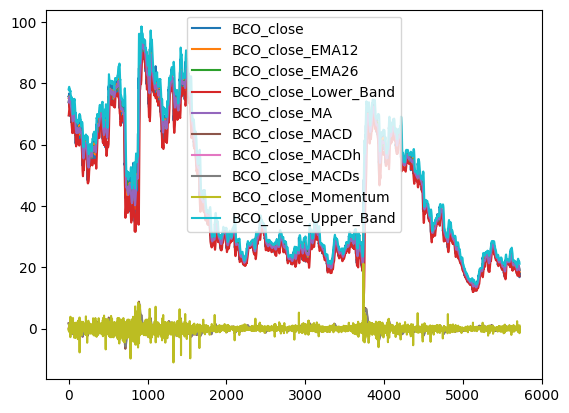

In [85]:
df[df.columns[:10]].plot()


<AxesSubplot:>

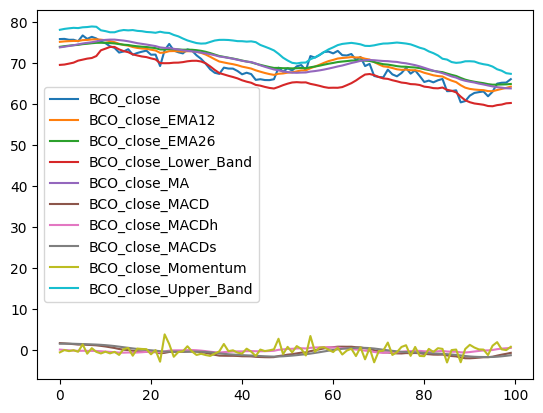

In [86]:
df[df.columns[:10]][:100].plot()


FOR PCA 


In [87]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


Preparing Data:

Ensuring that DataFrame contains only numerical data.
Ensuring that data is standardized (mean = 0, variance = 1 for each variable)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_scaled_df = []
for df in pro_processed_dfs:
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    all_scaled_df.append(scaled_df)

Calculating the Covariance Matrix
plotting it and sorting it

Explained Variance Ratios: [0.16312513 0.11192887]


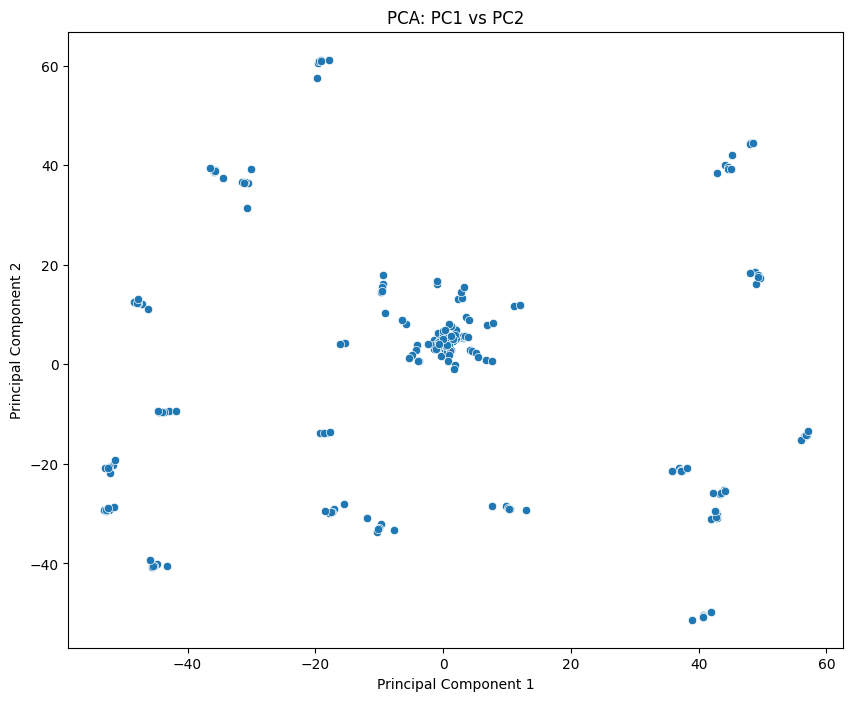

Explained Variance Ratios: [0.16413493 0.11179591]


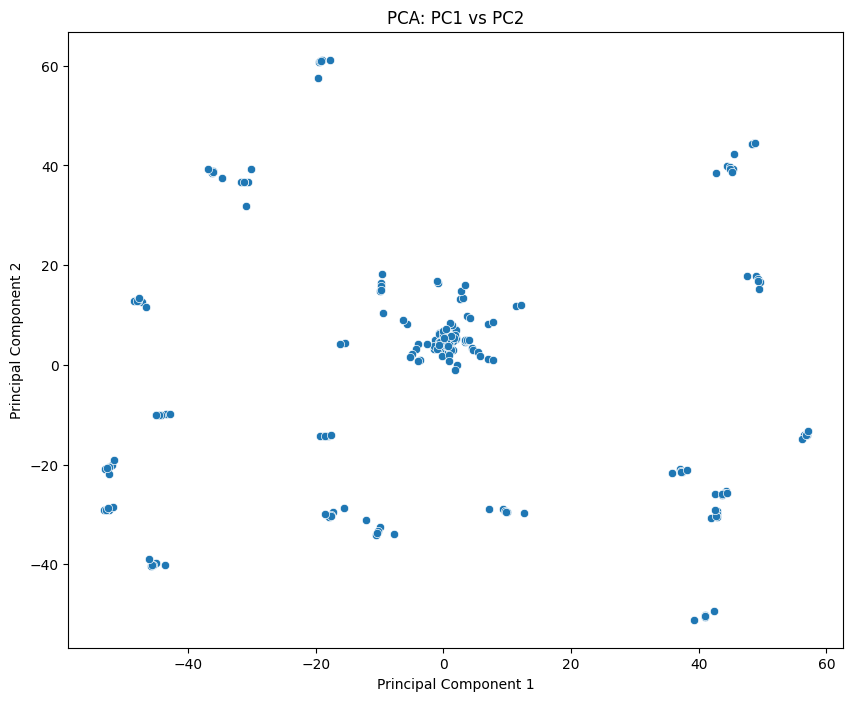

Explained Variance Ratios: [0.16187505 0.111836  ]


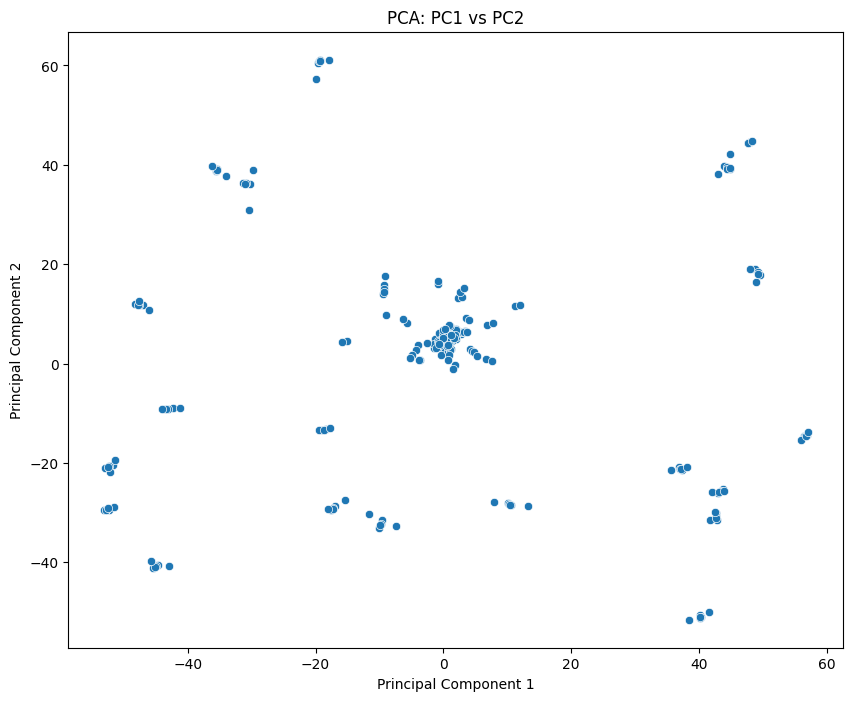

Explained Variance Ratios: [0.16297476 0.11186303]


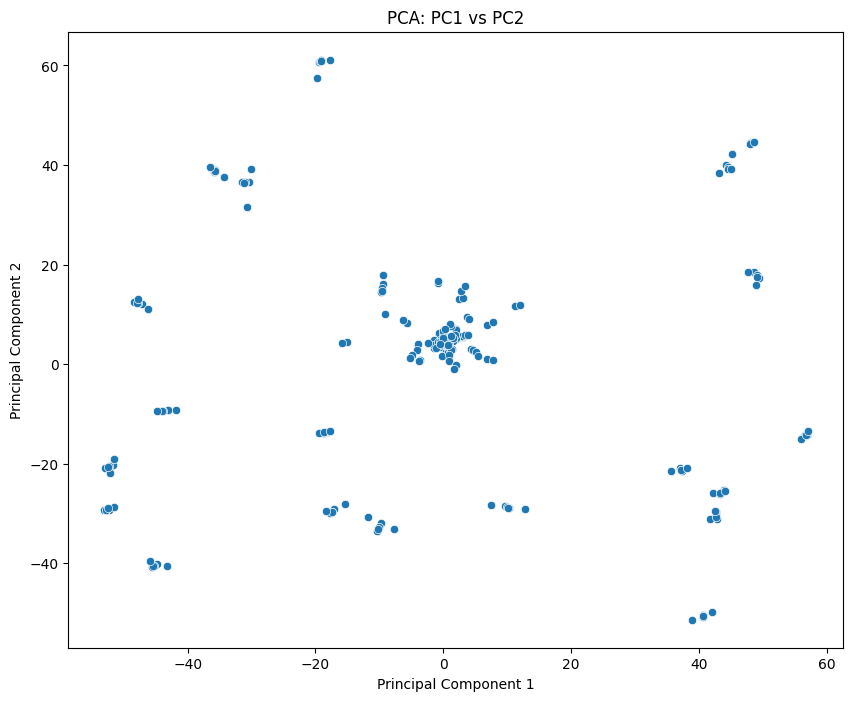

In [89]:
for df in all_scaled_df:
    n_components = 2  # You can change this to 3 for 3D visualization

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.T)
    explained_variance = pca.explained_variance_ratio_
    print("Explained Variance Ratios:", explained_variance)
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=pca_result, columns=[
                          f'PC{i}' for i in range(1, n_components + 1)])
    
    # Plot the first two principal components
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', data=pca_df)
    plt.title('PCA: PC1 vs PC2')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    

In [90]:
pca_df


PC1        PC2
0    36.995424 -20.890575
1    37.161429 -21.190797
2    37.355562 -21.431615
3    35.716648 -21.514423
4    37.196506 -21.341859
..         ...        ...
215  -4.872174   1.901096
216   0.025781   5.186715
217  -5.206594   1.267388
218  -0.580824   4.084319
219 -36.529817  39.567223

[220 rows x 2 columns]

Explained Variance Ratios: [0.16312513 0.11192887 0.08526636]


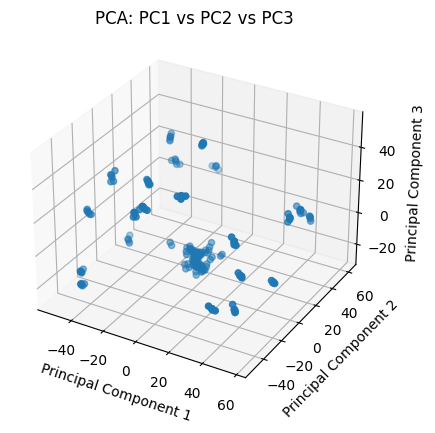

Explained Variance Ratios: [0.16413493 0.11179591 0.08451057]


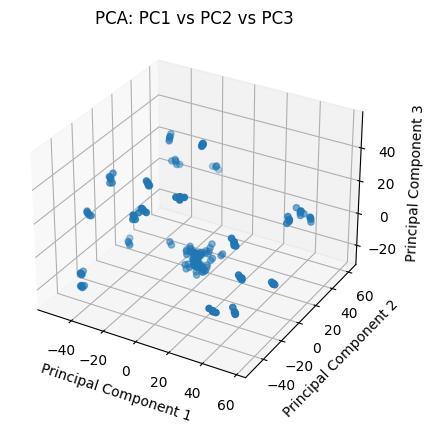

Explained Variance Ratios: [0.16187505 0.111836   0.08643436]


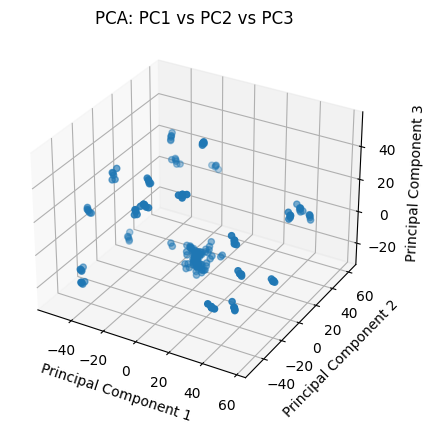

Explained Variance Ratios: [0.16297476 0.11186303 0.08544715]


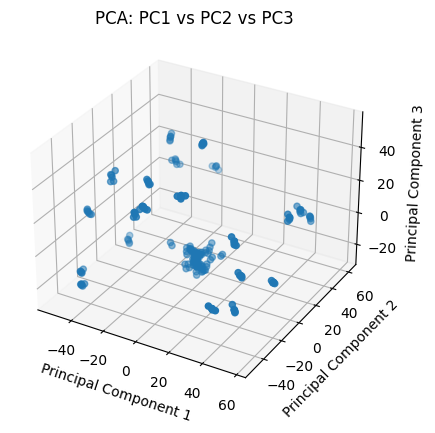

In [91]:
for df in all_scaled_df:
    n_components = 3  # You can change this to 3 for 3D visualization

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.T)
    explained_variance = pca.explained_variance_ratio_
    print("Explained Variance Ratios:", explained_variance)
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=pca_result, columns=[
                          f'PC{i}' for i in range(1, n_components + 1)])

    # Visualize in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('PCA: PC1 vs PC2 vs PC3')
    plt.show()


Explained Variance Ratios: [0.16312513 0.11192887 0.08526636 0.05519386]


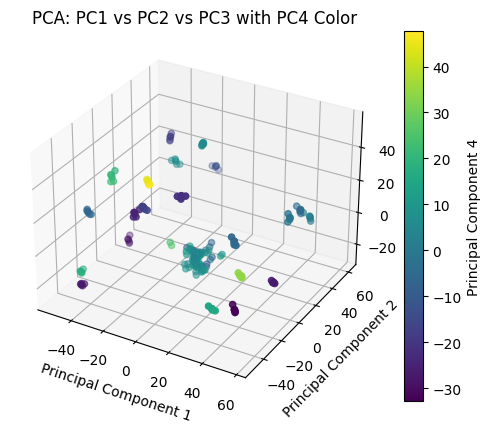

Explained Variance Ratios: [0.16413493 0.11179591 0.08451057 0.05517665]


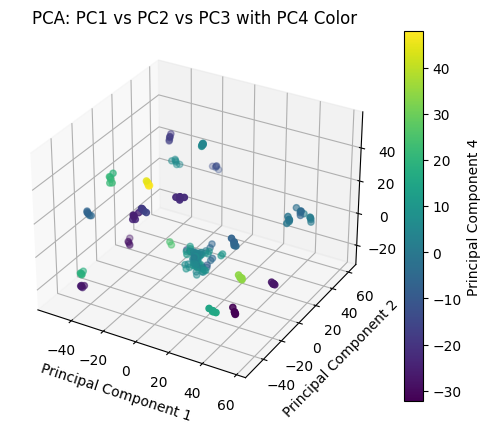

Explained Variance Ratios: [0.16187505 0.111836   0.08643436 0.0552429 ]


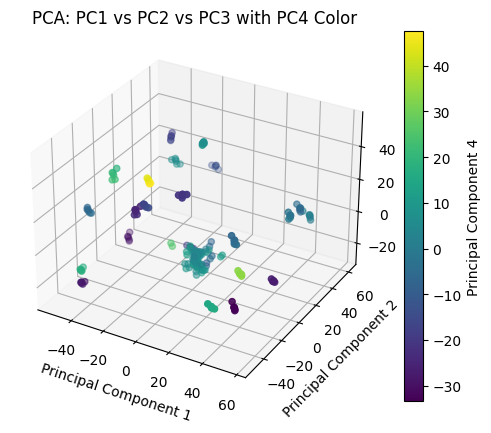

Explained Variance Ratios: [0.16297476 0.11186303 0.08544715 0.05518692]


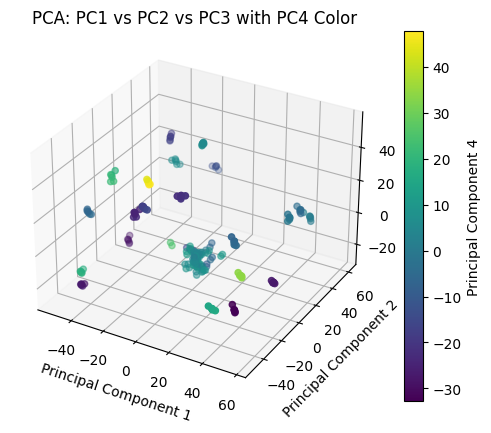

In [92]:
for df in all_scaled_df:
    n_components = 4  # You can change this to 3 for 3D visualization

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.T)
    explained_variance = pca.explained_variance_ratio_
    print("Explained Variance Ratios:", explained_variance)
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=pca_result, columns=[
                          f'PC{i}' for i in range(1, n_components + 1)])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'],
                         pca_df['PC3'], c=pca_df['PC4'], cmap='viridis')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('PCA: PC1 vs PC2 vs PC3 with PC4 Color')
    plt.colorbar(scatter, label='Principal Component 4')
    plt.show()


In [93]:
pca_df

PC1        PC2        PC3        PC4
0    36.995424 -20.890572  16.953925  -4.673633
1    37.161429 -21.190795  18.360550  -5.298707
2    37.355562 -21.431612  19.475082  -5.619504
3    35.716648 -21.514421  21.527257  -6.718478
4    37.196506 -21.341857  19.263365  -5.675818
..         ...        ...        ...        ...
215  -4.872174   1.901095 -22.004356   9.080452
216   0.025781   5.186730 -21.122352   9.487550
217  -5.206594   1.267382 -18.971403   7.053902
218  -0.580824   4.084320 -15.849987   6.112967
219 -36.529817  39.567221  30.397281 -16.926755

[220 rows x 4 columns]

In [99]:
from gc import collect
collect;

Explained Variance Ratios: [0.16312513 0.11192887 0.08526636 0.05519386 0.04346222 0.03515127
 0.03253732 0.0237237  0.01997009 0.01811995 0.01560163 0.01533257
 0.01487486 0.01387245 0.01232993 0.01179405 0.01117517 0.0104018
 0.00965337 0.00953632 0.00946249 0.00894292 0.00858914 0.00850619
 0.00800773 0.00785166 0.00754926 0.00724132 0.00702755 0.00662511
 0.00659228 0.00620952 0.00600245 0.00575755 0.00570366 0.00553975
 0.00544984 0.00505905 0.00494907 0.00483444]


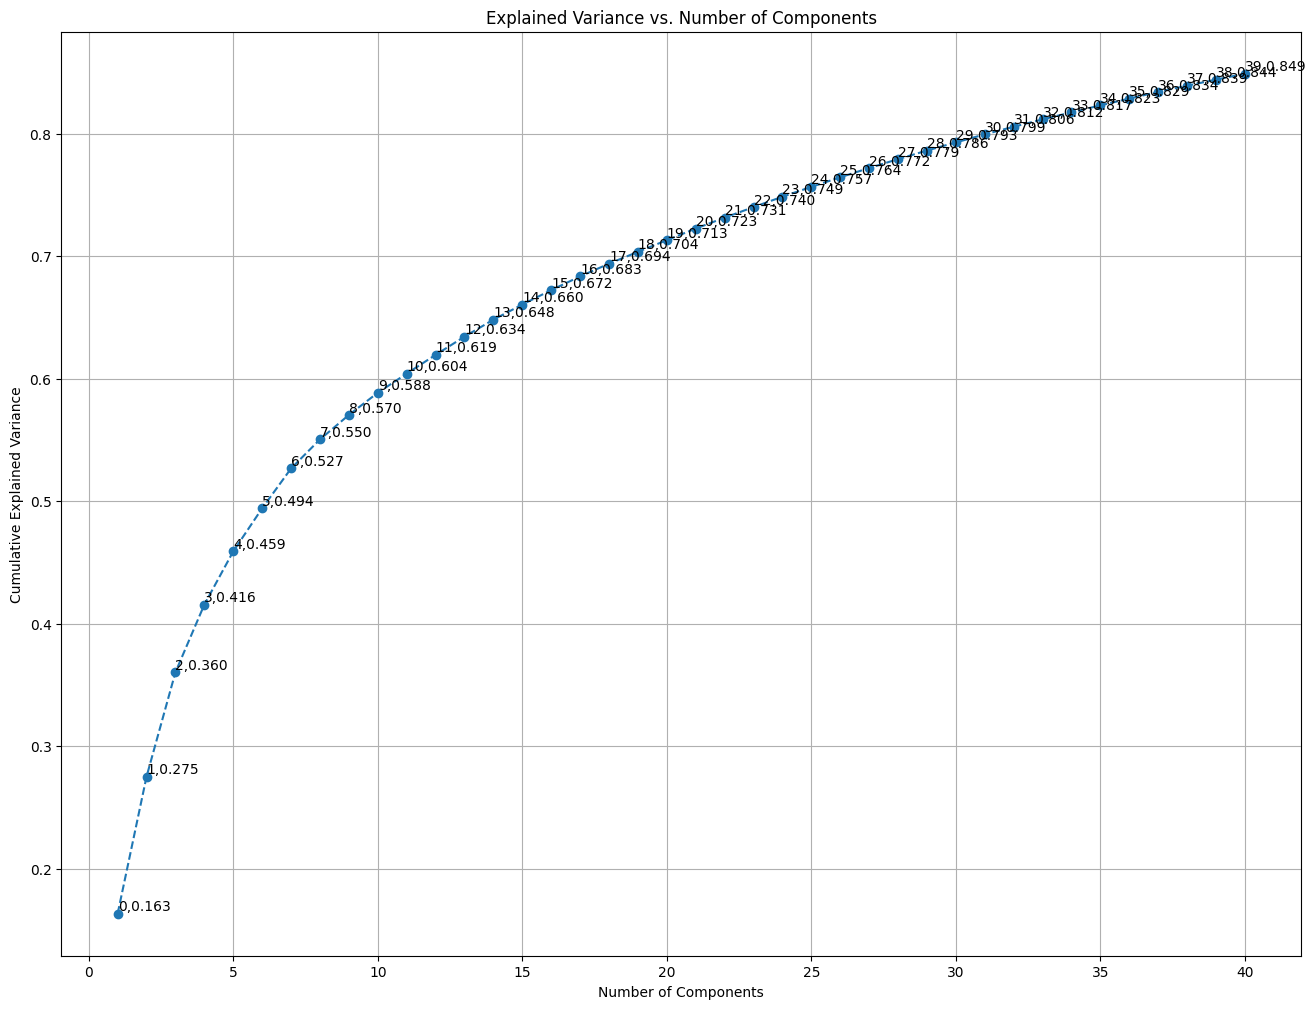

Explained Variance Ratios: [0.16413493 0.11179591 0.08451057 0.05517665 0.04285056 0.0347705
 0.03194613 0.02330909 0.01955902 0.01824239 0.01563165 0.01533827
 0.01386104 0.01355734 0.01188167 0.01118271 0.0110452  0.01042087
 0.00977177 0.00949639 0.00933824 0.00895424 0.00856794 0.00851278
 0.00802465 0.00784224 0.00760323 0.0072748  0.00710387 0.00670586
 0.00665548 0.00628424 0.00604939 0.00591844 0.00573471 0.00561643
 0.00550463 0.00523154 0.00510477 0.00498131]


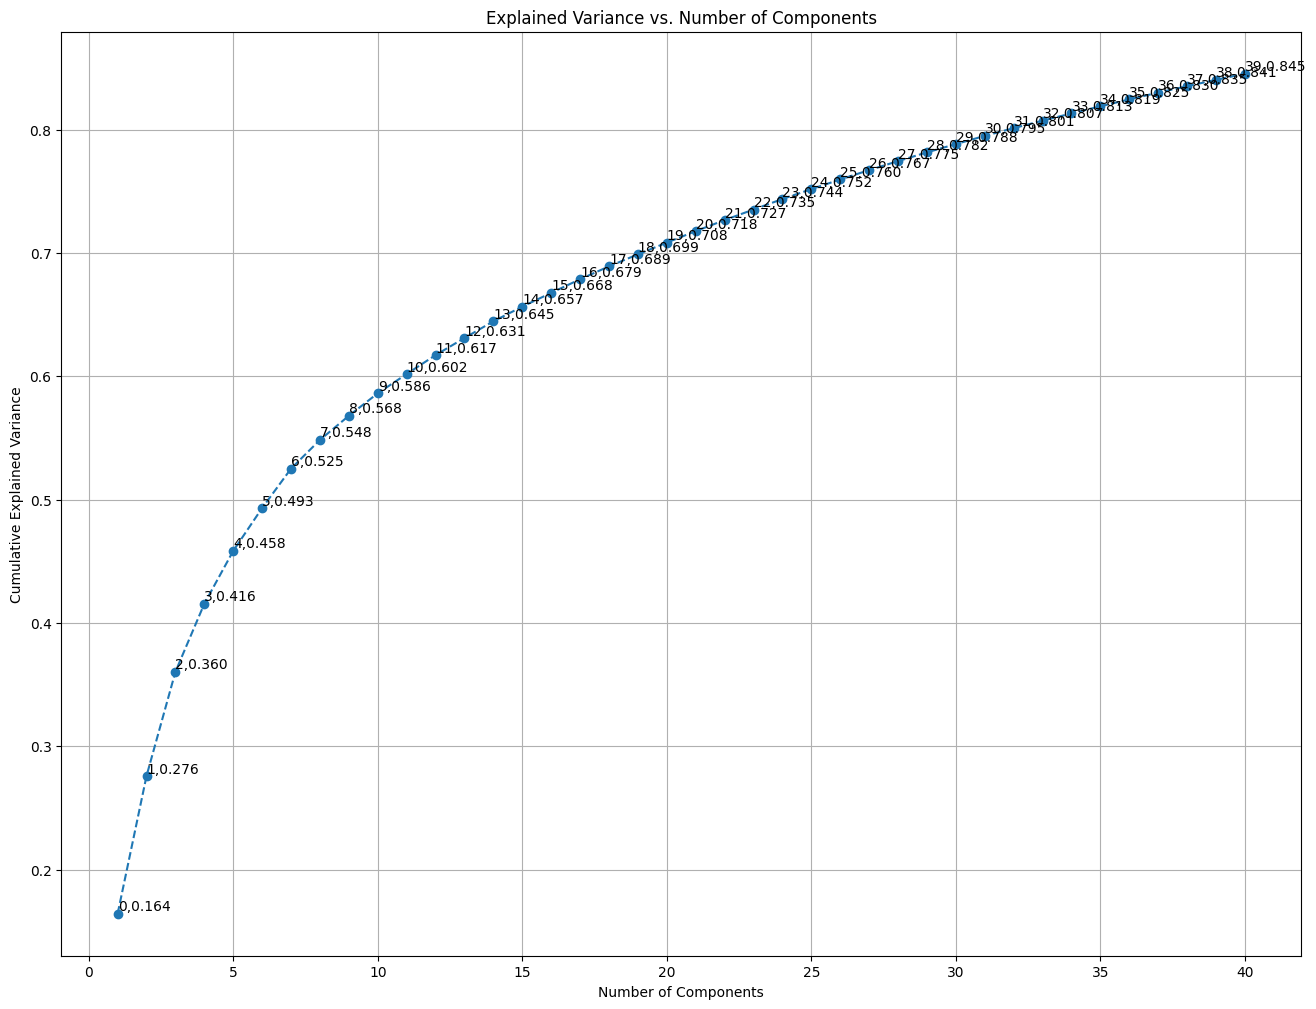

Explained Variance Ratios: [0.16187505 0.111836   0.08643436 0.0552429  0.04402124 0.03590496
 0.03285008 0.02420209 0.02025695 0.01800844 0.01560186 0.01525352
 0.0149258  0.01381179 0.01231897 0.01188614 0.01115087 0.01031104
 0.00960925 0.00952665 0.00943056 0.00881032 0.00857344 0.00847231
 0.00798584 0.00781967 0.00744342 0.00725305 0.007001   0.00655064
 0.00649538 0.00614554 0.00591702 0.00578331 0.00565864 0.00554649
 0.00525183 0.00511863 0.0050181  0.00481826]


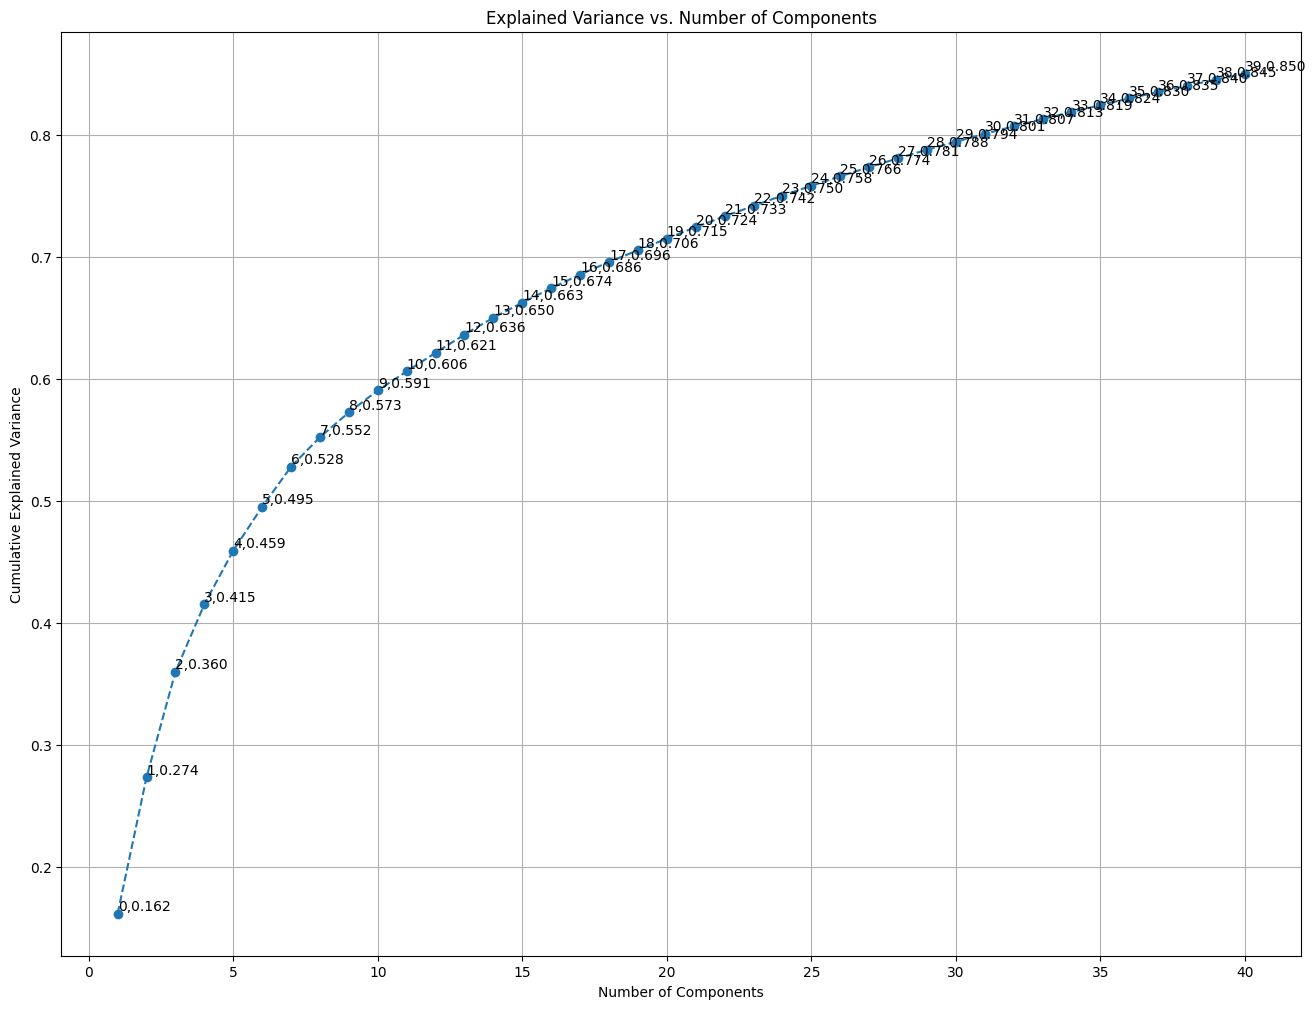

Explained Variance Ratios: [0.16297476 0.11186303 0.08544715 0.05518692 0.04343849 0.0352412
 0.03259278 0.0237054  0.0199381  0.01818285 0.01569779 0.01564981
 0.01512869 0.01415331 0.01258222 0.01189767 0.01124821 0.01041853
 0.0097167  0.00963776 0.00946187 0.00886456 0.00863686 0.00850542
 0.00801207 0.00788364 0.00748831 0.00723882 0.0070368  0.006604
 0.00654794 0.0062264  0.00595187 0.00579785 0.00575419 0.00562117
 0.00548169 0.0051981  0.00499767 0.00495325]


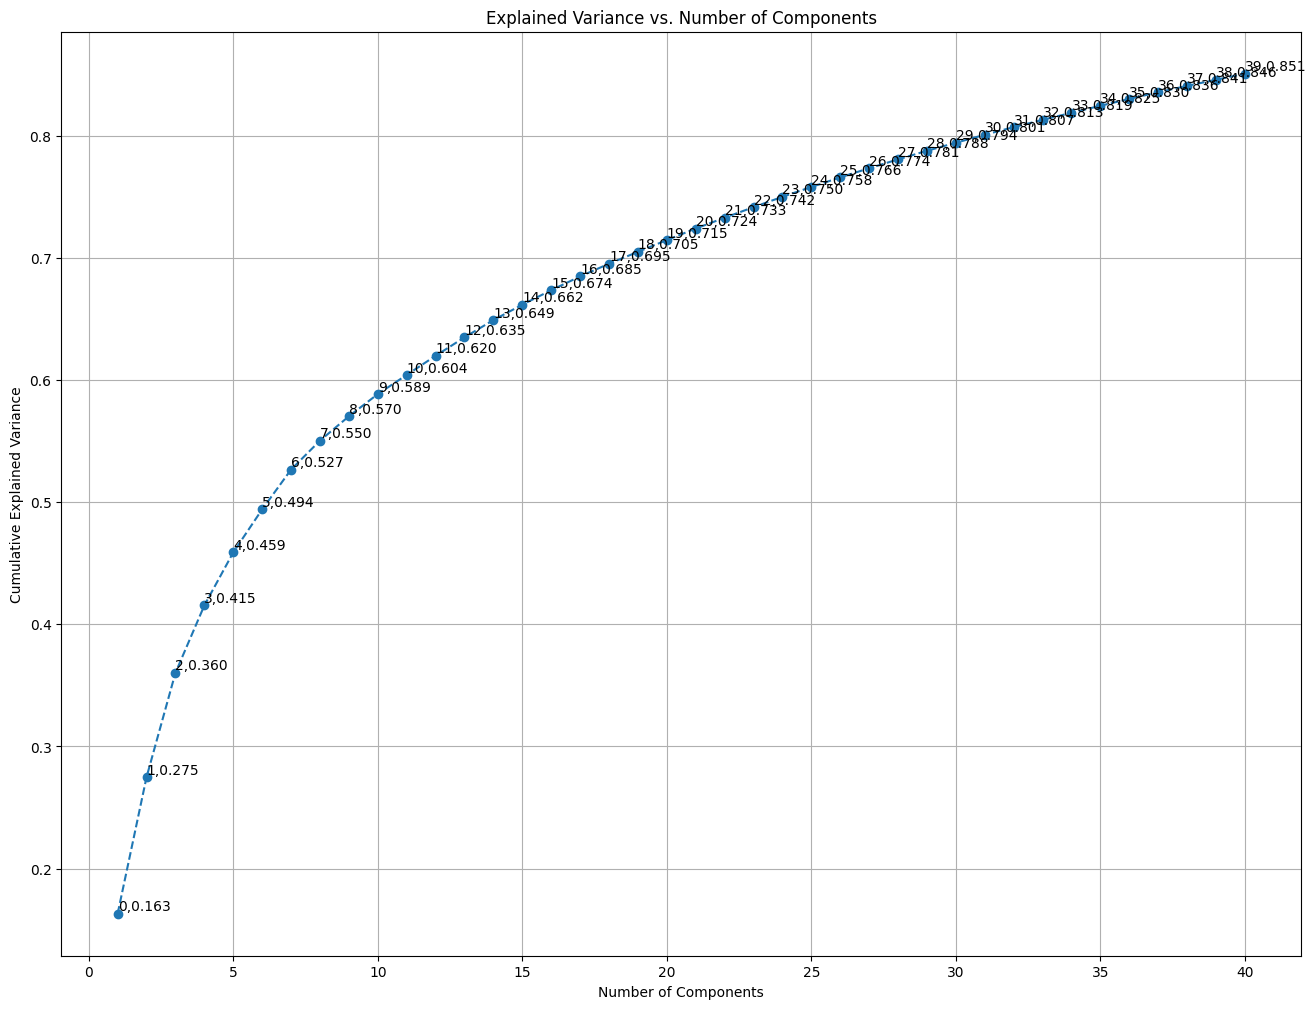

In [100]:
for df in all_scaled_df:
    n_components = 40  # You can change this to 3 for 3D visualization

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.T)
    explained_variance = pca.explained_variance_ratio_
    print("Explained Variance Ratios:", explained_variance)
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=pca_result, columns=[
                          f'PC{i}' for i in range(1, n_components + 1)])
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(16, 12))
    plt.plot(range(1, len(cumulative_variance) + 1),
             cumulative_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    # plt.ylim(0.9, 1.01)
    for i, var in enumerate(cumulative_variance):
        # if i <15:
        #     continue
        plt.text(i + 1, var, f'{i},{var:.3f}', ha='left', va='bottom')


    plt.grid()
    plt.show()


In [103]:
pca_df
collect;

In [102]:
collect;